## Credit card fraud detection

#### Dataset link : https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

### Loading the dataset

In [1]:
#importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# loading the dataset from the link
df = pd.read_csv("creditcard.csv")

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [5]:
# show the rows and columns of dataset
df.shape

(284807, 31)

In [6]:
# checking of duplicate values
df.duplicated().value_counts()

False    283726
True       1081
dtype: int64

In [7]:
#dropping the duplicates
df=df.drop_duplicates()

In [8]:
# target variables
df.Class.value_counts()

0    283253
1       473
Name: Class, dtype: int64

In [9]:
df.shape

(283726, 31)

In [10]:
# shows the unique features of dataset
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [11]:
# Basic information
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 283726 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    283726 non-null  float64
 1   V1      283726 non-null  float64
 2   V2      283726 non-null  float64
 3   V3      283726 non-null  float64
 4   V4      283726 non-null  float64
 5   V5      283726 non-null  float64
 6   V6      283726 non-null  float64
 7   V7      283726 non-null  float64
 8   V8      283726 non-null  float64
 9   V9      283726 non-null  float64
 10  V10     283726 non-null  float64
 11  V11     283726 non-null  float64
 12  V12     283726 non-null  float64
 13  V13     283726 non-null  float64
 14  V14     283726 non-null  float64
 15  V15     283726 non-null  float64
 16  V16     283726 non-null  float64
 17  V17     283726 non-null  float64
 18  V18     283726 non-null  float64
 19  V19     283726 non-null  float64
 20  V20     283726 non-null  float64
 21  V21     28

In [12]:
# checking of null values
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [13]:
# statistical description of unique features
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,...,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000
mean,94811.077600,0.005917,-0.004135,0.001613,-0.002966,0.001828,-0.001139,0.001801,-0.000854,-0.001596,...,-0.000371,-0.000015,0.000198,0.000214,-0.000232,0.000149,0.001763,0.000547,88.472687,0.001667
std,47481.047891,1.948026,1.646703,1.508682,1.414184,1.377008,1.331931,1.227664,1.179054,1.095492,...,0.723909,0.724550,0.623702,0.605627,0.521220,0.482053,0.395744,0.328027,250.399437,0.040796
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,54204.750000,-0.915951,-0.600321,-0.889682,-0.850134,-0.689830,-0.769031,-0.552509,-0.208828,-0.644221,...,-0.228305,-0.542700,-0.161703,-0.354453,-0.317485,-0.326763,-0.070641,-0.052818,5.600000,0.000000
50%,84692.500000,0.020384,0.063949,0.179963,-0.022248,-0.053468,-0.275168,0.040859,0.021898,-0.052596,...,-0.029441,0.006675,-0.011159,0.041016,0.016278,-0.052172,0.001479,0.011288,22.000000,0.000000
75%,139298.000000,1.316068,0.800283,1.026960,0.739647,0.612218,0.396792,0.570474,0.325704,0.595977,...,0.186194,0.528245,0.147748,0.439738,0.350667,0.240261,0.091208,0.078276,77.510000,0.000000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000


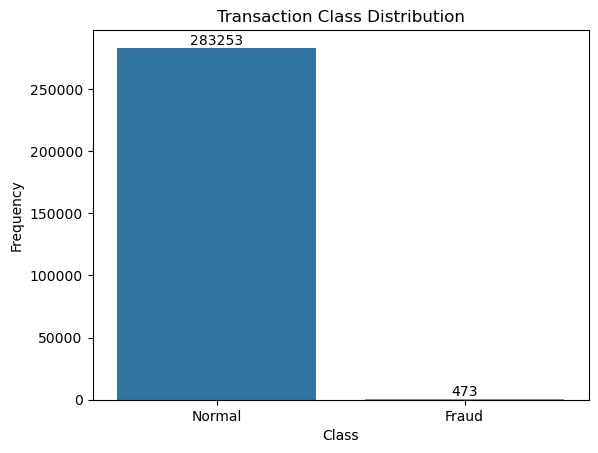

In [14]:
# setting the labels and plot in form of graph
LABELS = ["Normal", "Fraud"]
ax = sns.countplot(data=df, x='Class')
for label in ax.containers:
    ax.bar_label(label)
    
plt.title("Transaction Class Distribution")

plt.xticks(range(2), LABELS)
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.show()

In [15]:
# Get the Fraud and the normal dataset 

fraud = df[df['Class']==1]

normal = df[df['Class']==0]

In [16]:
fraud

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


In [17]:
normal

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [18]:
# rows and columns of fraud and normal transaction
print(fraud.shape,normal.shape)

(473, 31) (283253, 31)


#### Uni-variant analysis

In [19]:
#gives the mean of all the columns based on normal and fraud
df.groupby('Class').mean() 

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94835.058093,0.013439,-0.009829,0.012853,-0.010440,0.006769,0.001251,0.010447,-0.002448,0.002613,...,-0.000489,-0.00115,-0.000160,0.000360,0.000393,-0.000301,0.000065,0.001409,0.000418,88.413575
1,80450.513742,-4.498280,3.405965,-6.729599,4.472591,-2.957197,-1.432518,-5.175912,0.953255,-2.522124,...,0.405043,0.46655,0.086639,-0.096464,-0.106643,0.040615,0.050456,0.213774,0.078270,123.871860


In [20]:
# statistical description of fraud in amount features
fraud.Amount.describe()

count     473.000000
mean      123.871860
std       260.211041
min         0.000000
25%         1.000000
50%         9.820000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [21]:
# statistical description of normal in amount features
normal.Amount.describe()

count    283253.000000
mean         88.413575
std         250.379023
min           0.000000
25%           5.670000
50%          22.000000
75%          77.460000
max       25691.160000
Name: Amount, dtype: float64

In [22]:
# sorting fraud transaction in terms of time
df.Time[df.Class == 1]

541          406.0
623          472.0
4920        4462.0
6108        6986.0
6329        7519.0
            ...   
279863    169142.0
280143    169347.0
280149    169351.0
281144    169966.0
281674    170348.0
Name: Time, Length: 473, dtype: float64

In [23]:
# sorting normal transaction in terms of time
df.Time[df.Class == 0]

0              0.0
1              0.0
2              1.0
3              1.0
4              2.0
            ...   
284802    172786.0
284803    172787.0
284804    172788.0
284805    172788.0
284806    172792.0
Name: Time, Length: 283253, dtype: float64

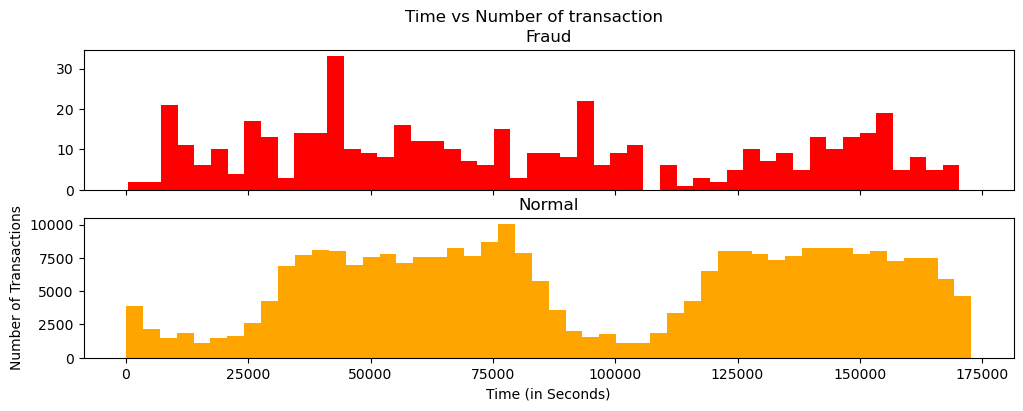

In [24]:
# plotting time vs no. of transaction (fraud/normal)
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12, 4))
f.suptitle('Time vs Number of transaction')

# Plot histogram for Fraud transactions (Class == 1) with red color
ax1.hist(df.Time[df.Class == 1], bins=50, color='red')
ax1.set_title('Fraud')

# Plot histogram for Normal transactions (Class == 0) with red color
ax2.hist(df.Time[df.Class == 0], bins=50, color='orange')
ax2.set_title('Normal')

# Set labels for the entire plot
plt.xlabel('Time (in Seconds)')
plt.ylabel('Number of Transactions')

# Display the plot
plt.show()

In [25]:
# sorting fraud transaction in terms of amount taken
fraud.Amount

541         0.00
623       529.00
4920      239.93
6108       59.00
6329        1.00
           ...  
279863    390.00
280143      0.76
280149     77.89
281144    245.00
281674     42.53
Name: Amount, Length: 473, dtype: float64

In [26]:
# sorting normal transaction in terms of amount taken
normal.Amount

0         149.62
1           2.69
2         378.66
3         123.50
4          69.99
           ...  
284802      0.77
284803     24.79
284804     67.88
284805     10.00
284806    217.00
Name: Amount, Length: 283253, dtype: float64

In [27]:
# show how much to be transacted based on individual class
amount = df.groupby('Class')['Amount'].sum().reset_index()
amount

,Class,Amount
0,0,25043410.29
1,1,58591.39


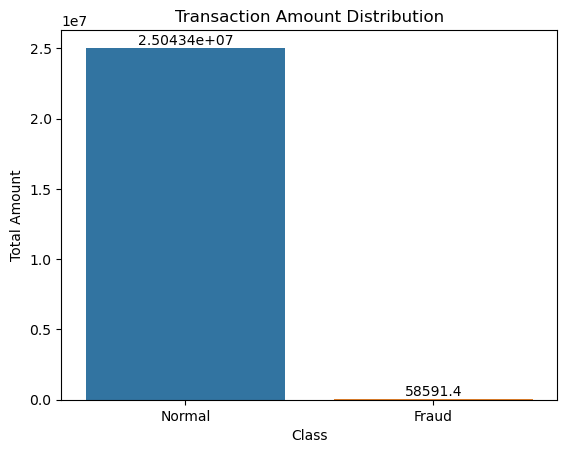

In [28]:
amount = df.groupby('Class')['Amount'].sum().reset_index()

# Create the bar plot
ay = sns.barplot(x='Class', y='Amount', data=amount)

# Add labels to the bars
for container in ay.containers:
    ay.bar_label(container)

# Set title and labels
plt.title("Transaction Amount Distribution")
plt.xticks(range(2), ["Normal", "Fraud"])  # Assuming 'Class' has 2 categories
plt.xlabel("Class")
plt.ylabel("Total Amount")

# Display the plot
plt.show()


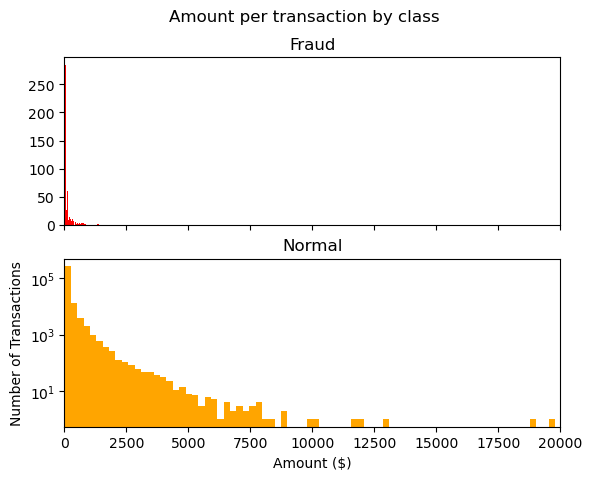

In [29]:
# plotting amount vs no. of transaction
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Amount per transaction by class')
ax1.hist(fraud.Amount, bins = 50,color='red')
ax1.set_title('Fraud')

ax2.hist(normal.Amount, bins = 100,color='orange')
ax2.set_title('Normal')

plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.xlim((0, 20000))
plt.yscale('log')
plt.show()

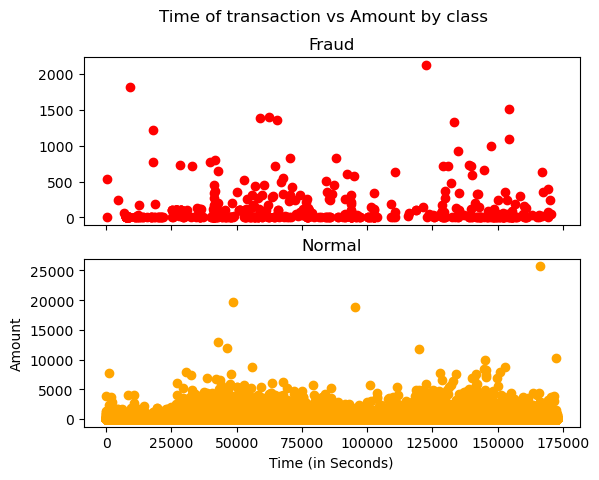

In [30]:
# plotting time vs amount transaction (fraud/normal)
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time of transaction vs Amount by class')
ax1.scatter(fraud.Time, fraud.Amount,color='red')
ax1.set_title('Fraud')
ax2.scatter(normal.Time, normal.Amount,color='orange')
ax2.set_title('Normal')
plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()

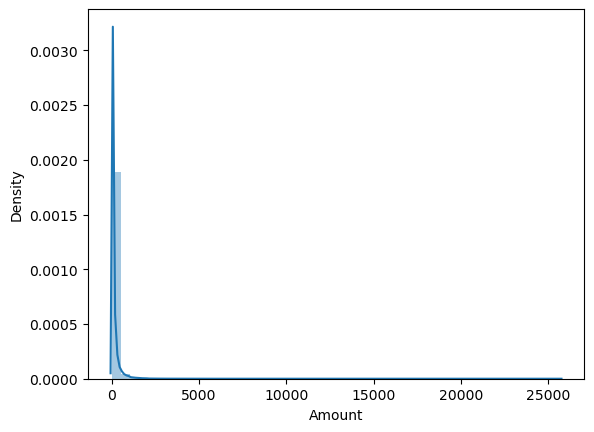

In [31]:
# sample distribution
sns.distplot(df['Amount'])
plt.show()

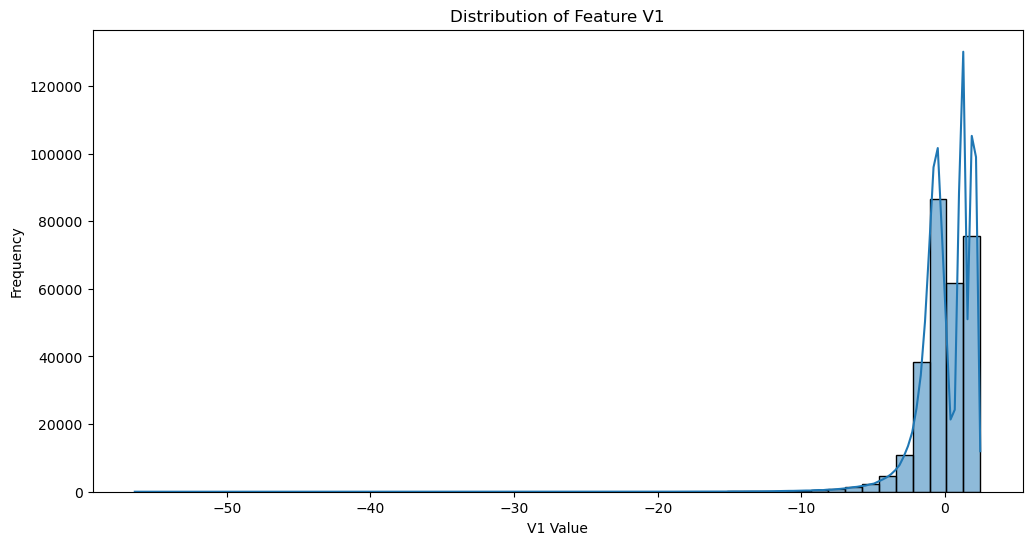

In [32]:
plt.figure(figsize=(12, 6))
sns.histplot(df['V1'],bins=50, kde=True)
plt.title('Distribution of Feature V1')
plt.xlabel('V1 Value')
plt.ylabel('Frequency')
plt.show()

In [33]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

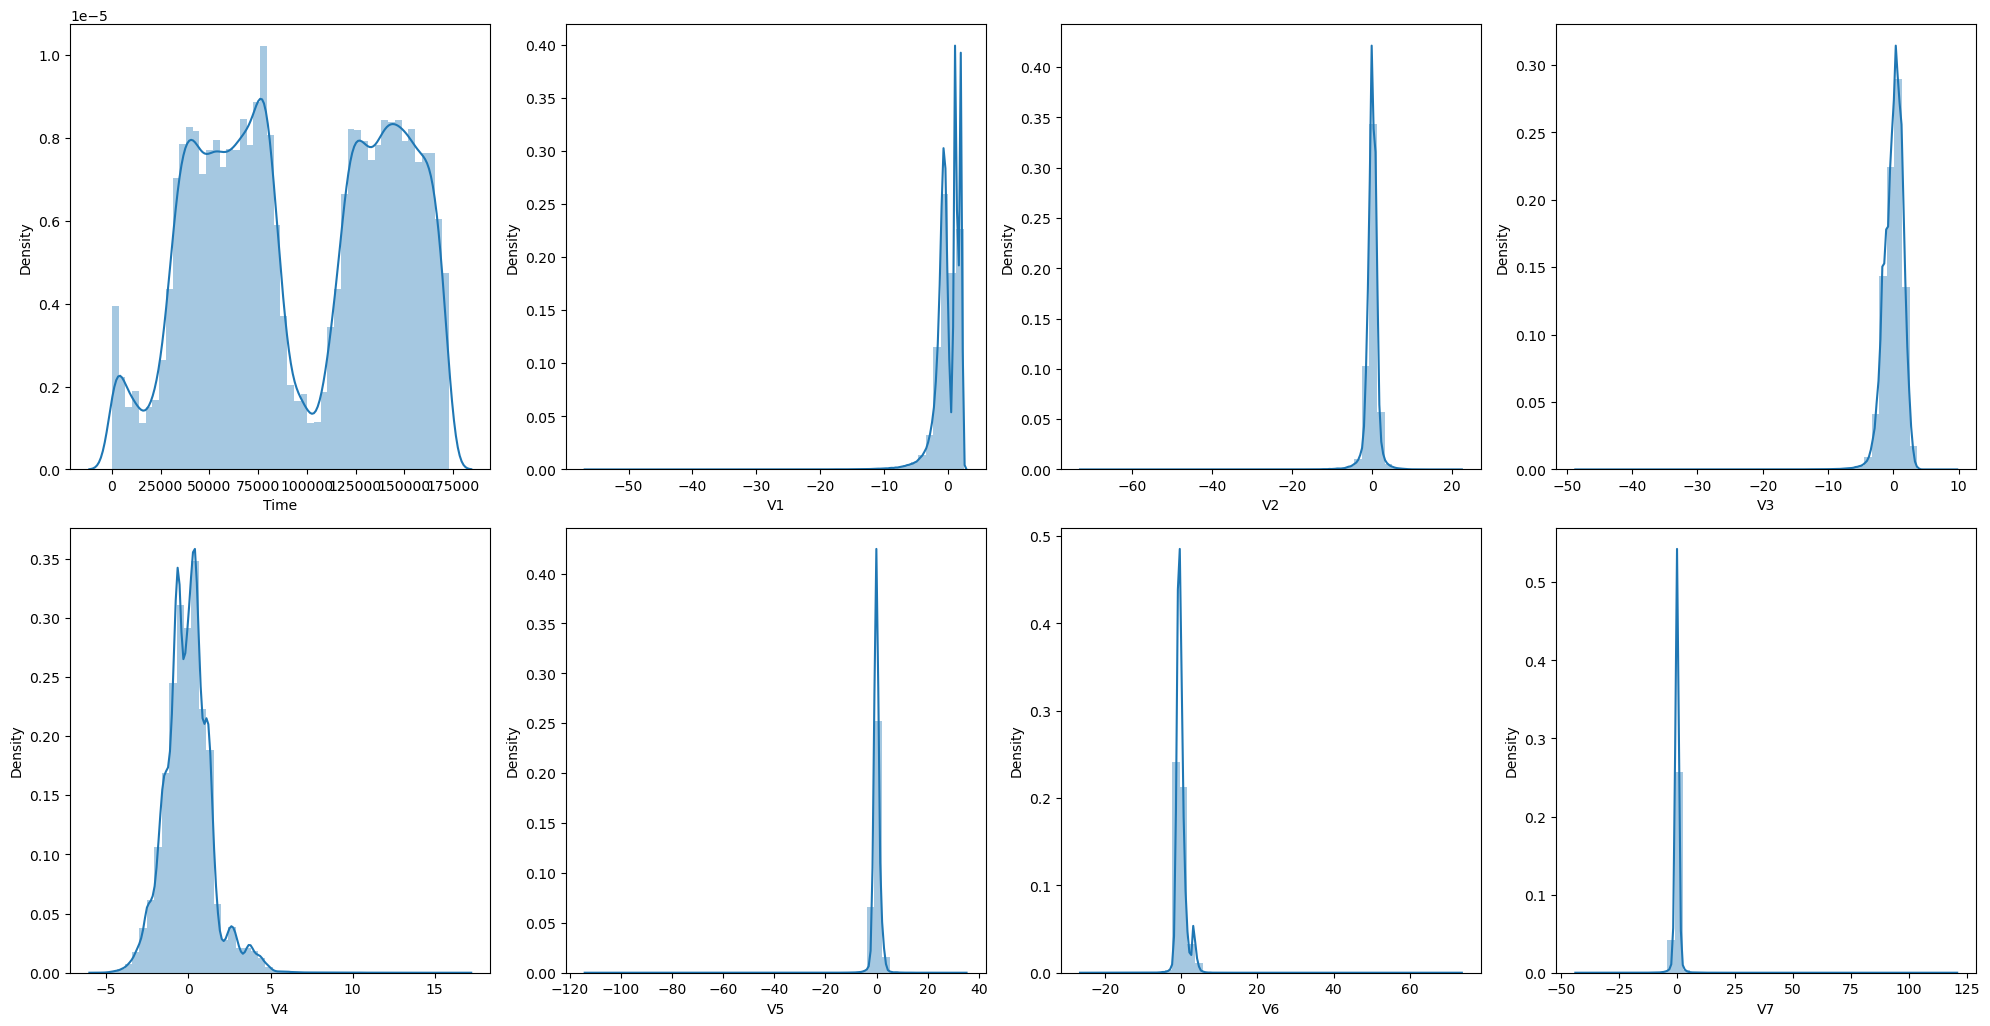

In [34]:
plt.figure(figsize = (20, 20))
plotnumber = 1
for column in df.columns[0:8]:
    if plotnumber <= 8:
        ax = plt.subplot(4, 4, plotnumber)
        sns.distplot(df[column], kde=True)
        plt.tight_layout()

    plotnumber += 1

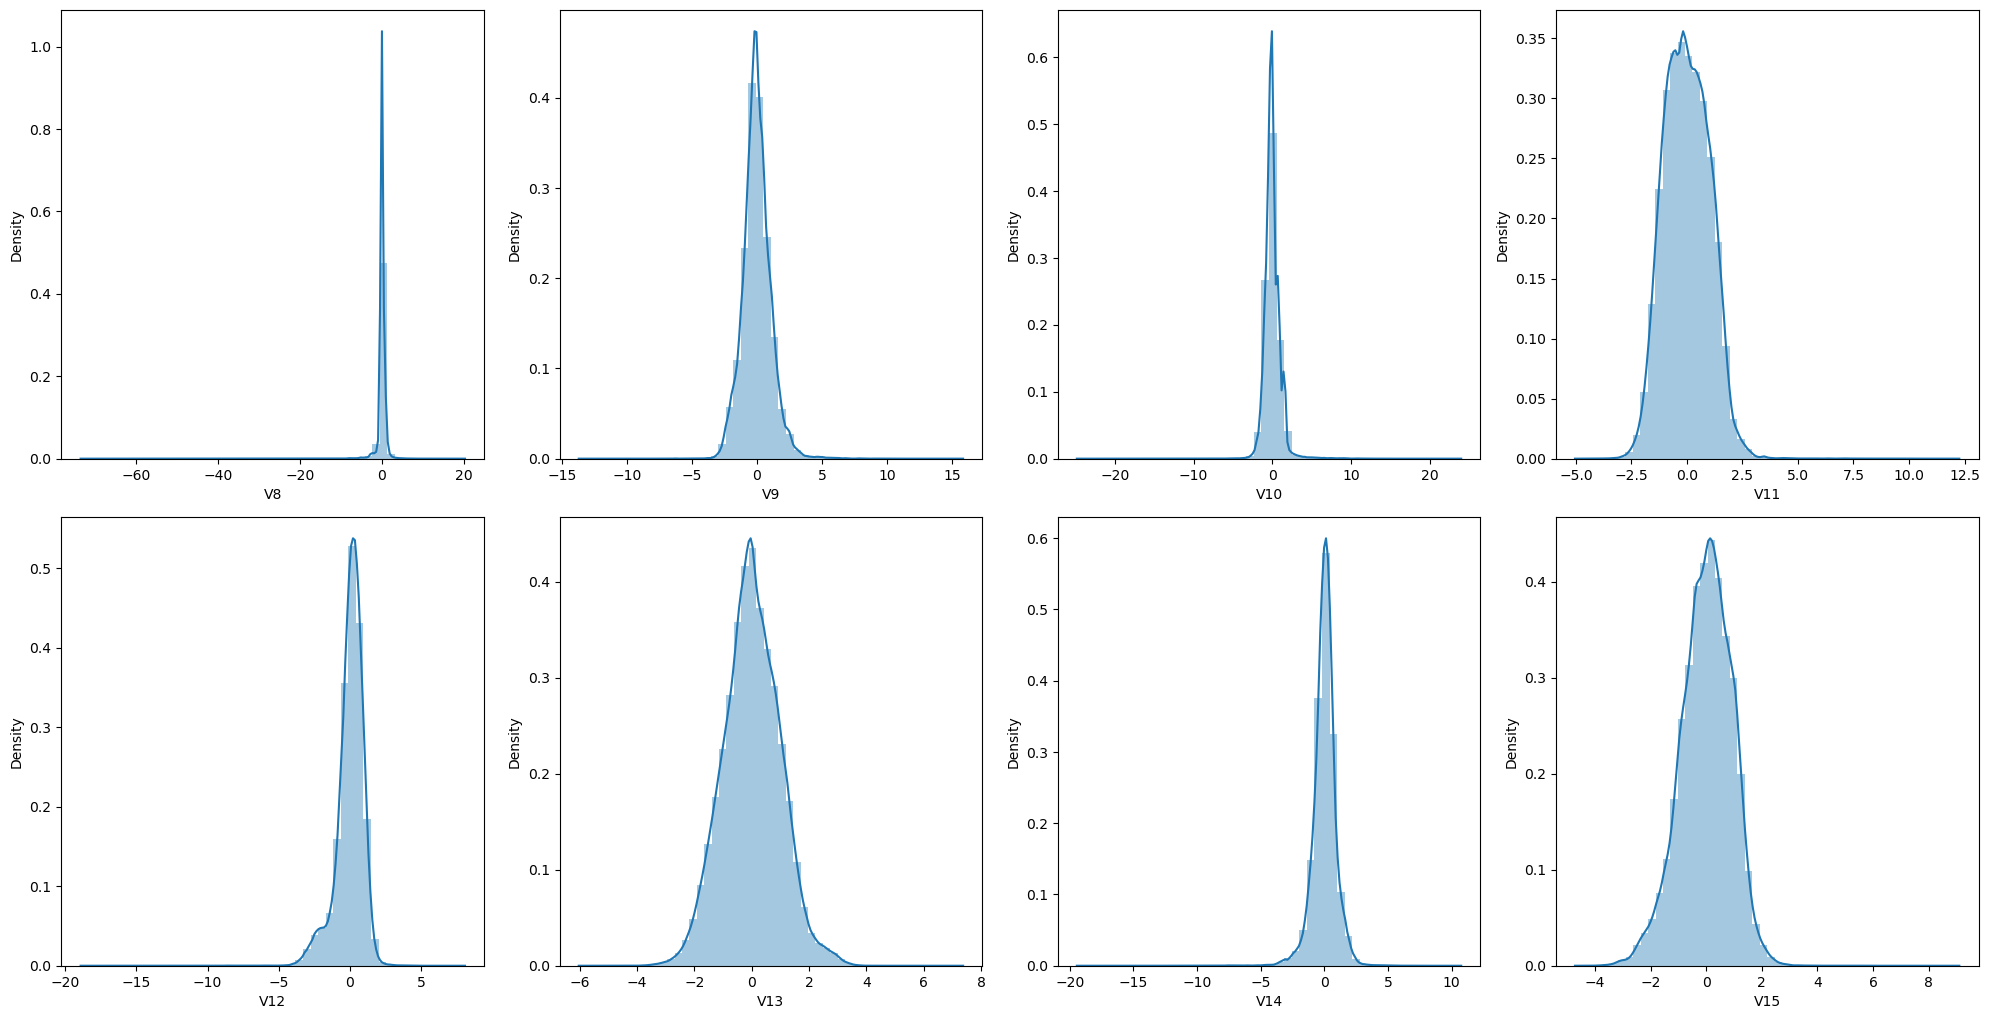

In [35]:
plt.figure(figsize = (20, 20))
plotnumber = 1
for column in df.columns[8:16]:
    if plotnumber <= 8:
        ax = plt.subplot(4, 4, plotnumber)
        sns.distplot(df[column], kde=True)
        plt.tight_layout()

    plotnumber += 1

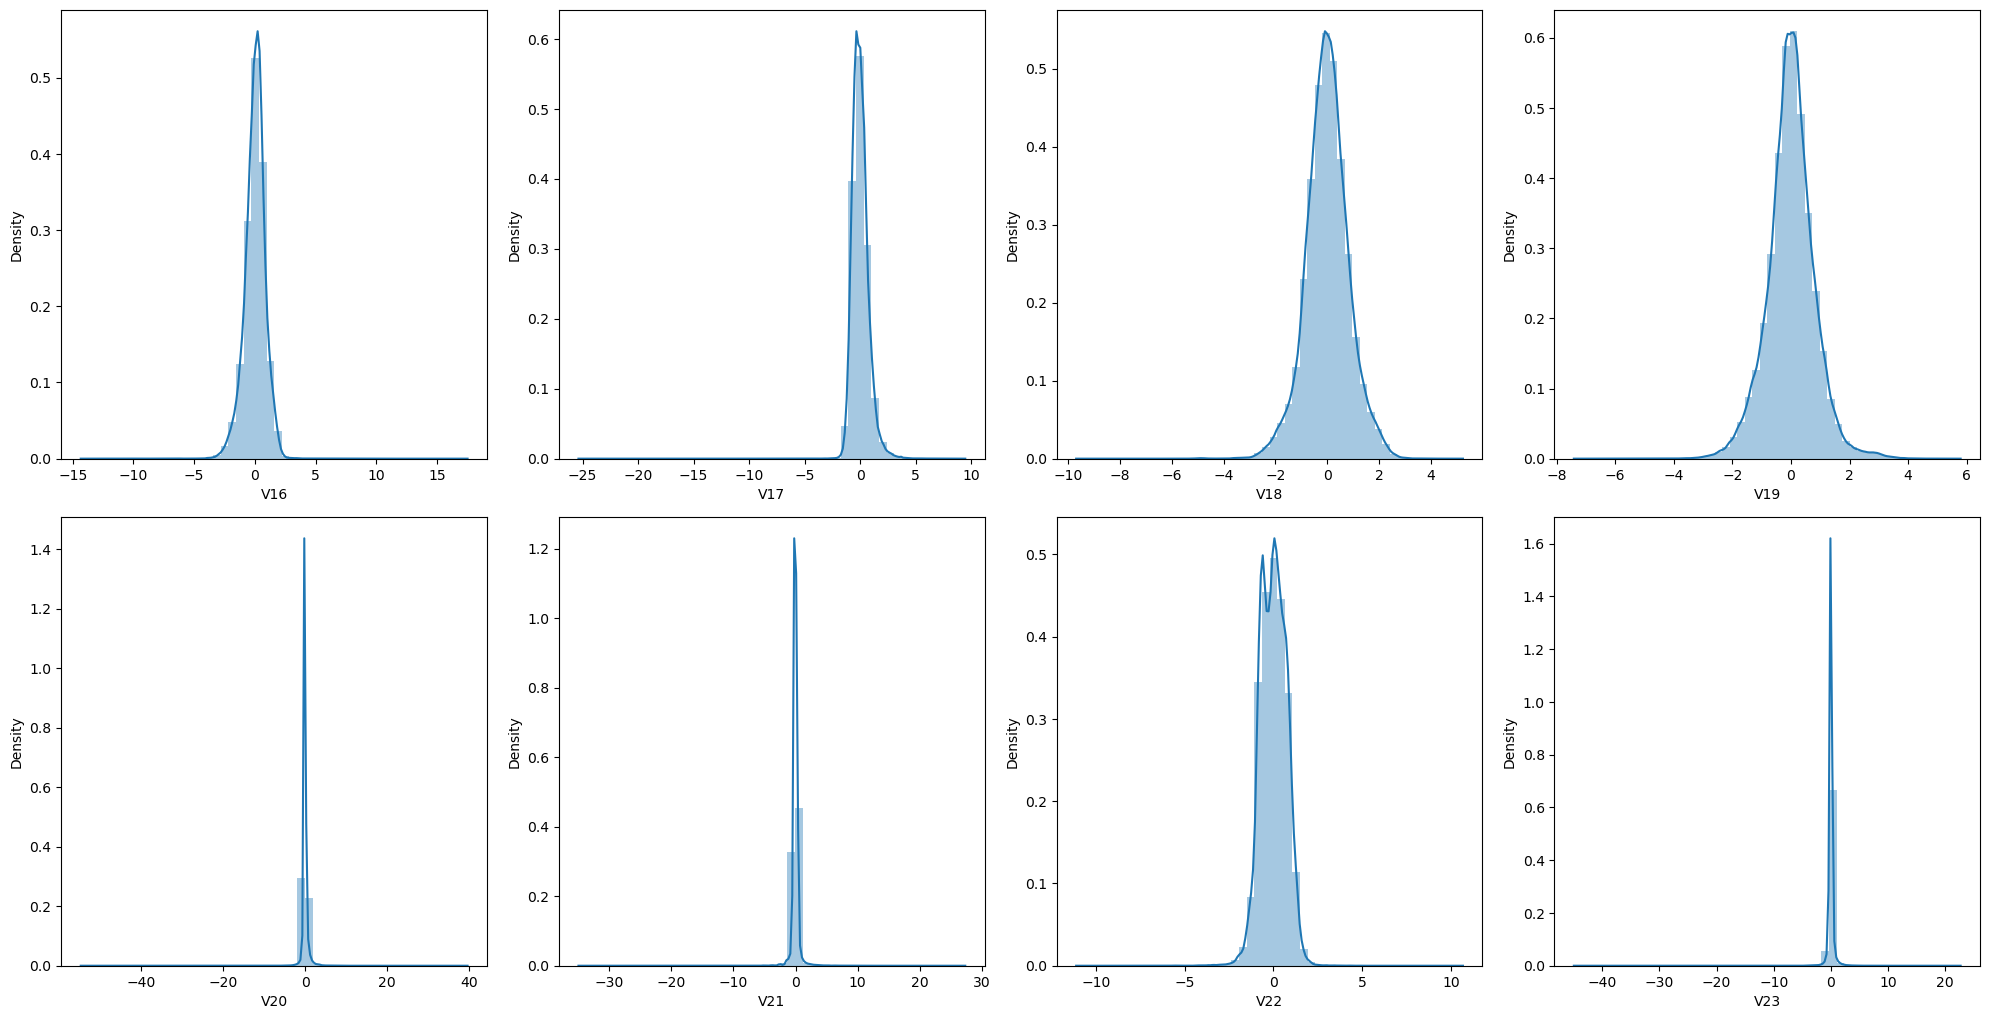

In [36]:
plt.figure(figsize = (20, 20))
plotnumber = 1
for column in df.columns[16:24]:
    if plotnumber <= 8:
        ax = plt.subplot(4, 4, plotnumber)
        sns.distplot(df[column], kde=True)
        plt.tight_layout()

    plotnumber += 1

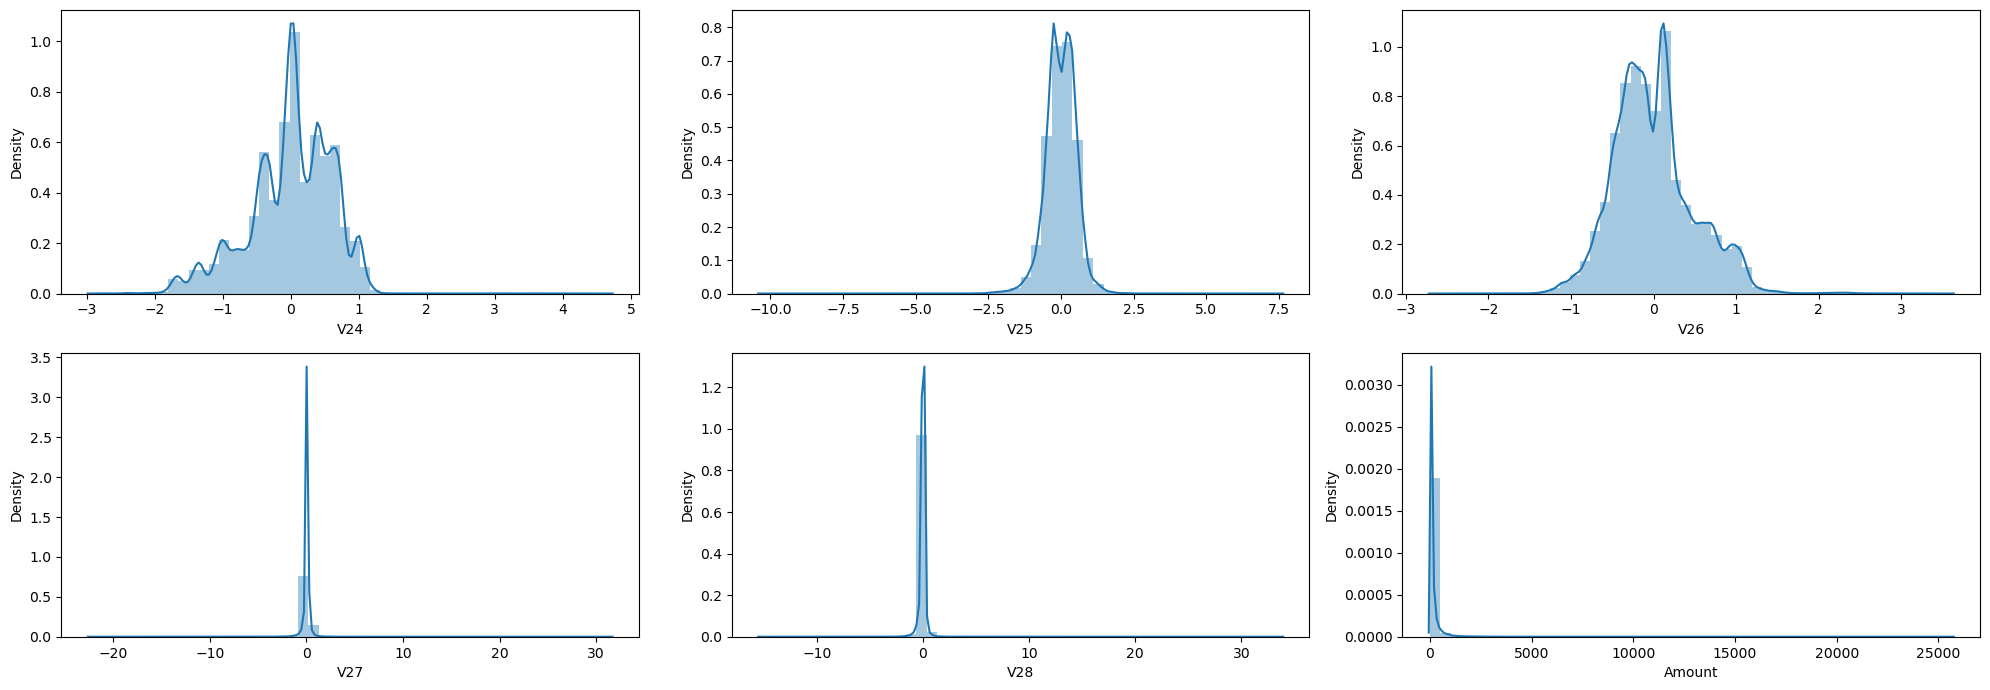

In [37]:
plt.figure(figsize = (20, 10))
plotnumber = 1
for column in df.columns[24:30]:
    if plotnumber <= 6:
        ax = plt.subplot(3, 3, plotnumber)
        sns.distplot(df[column], kde=True)
        plt.tight_layout()

    plotnumber += 1

#### Checking of Outliers

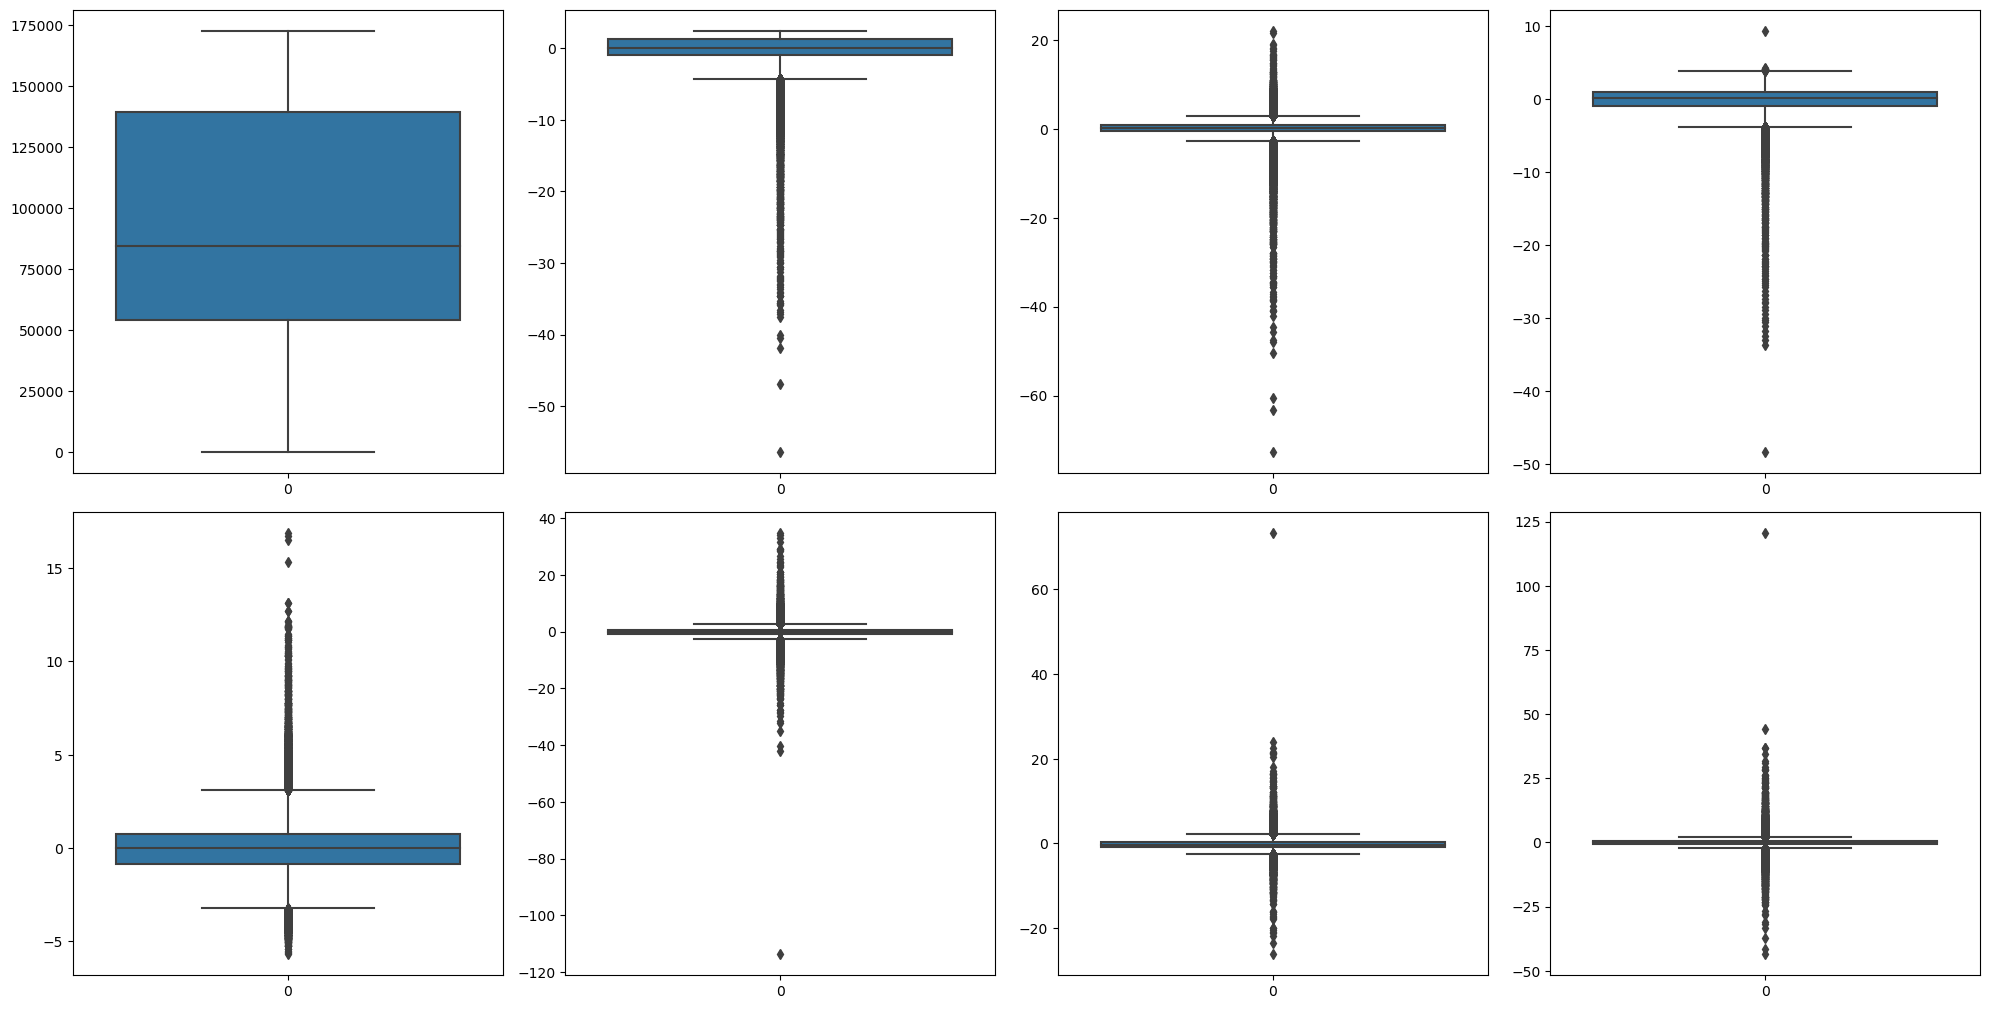

In [38]:
plt.figure(figsize = (20, 20))
plotnumber = 1
for column in df.columns[0:8]:
    if plotnumber <= 8:
        ax = plt.subplot(4, 4, plotnumber)
        sns.boxplot(df[column])
        plt.tight_layout()

    plotnumber += 1

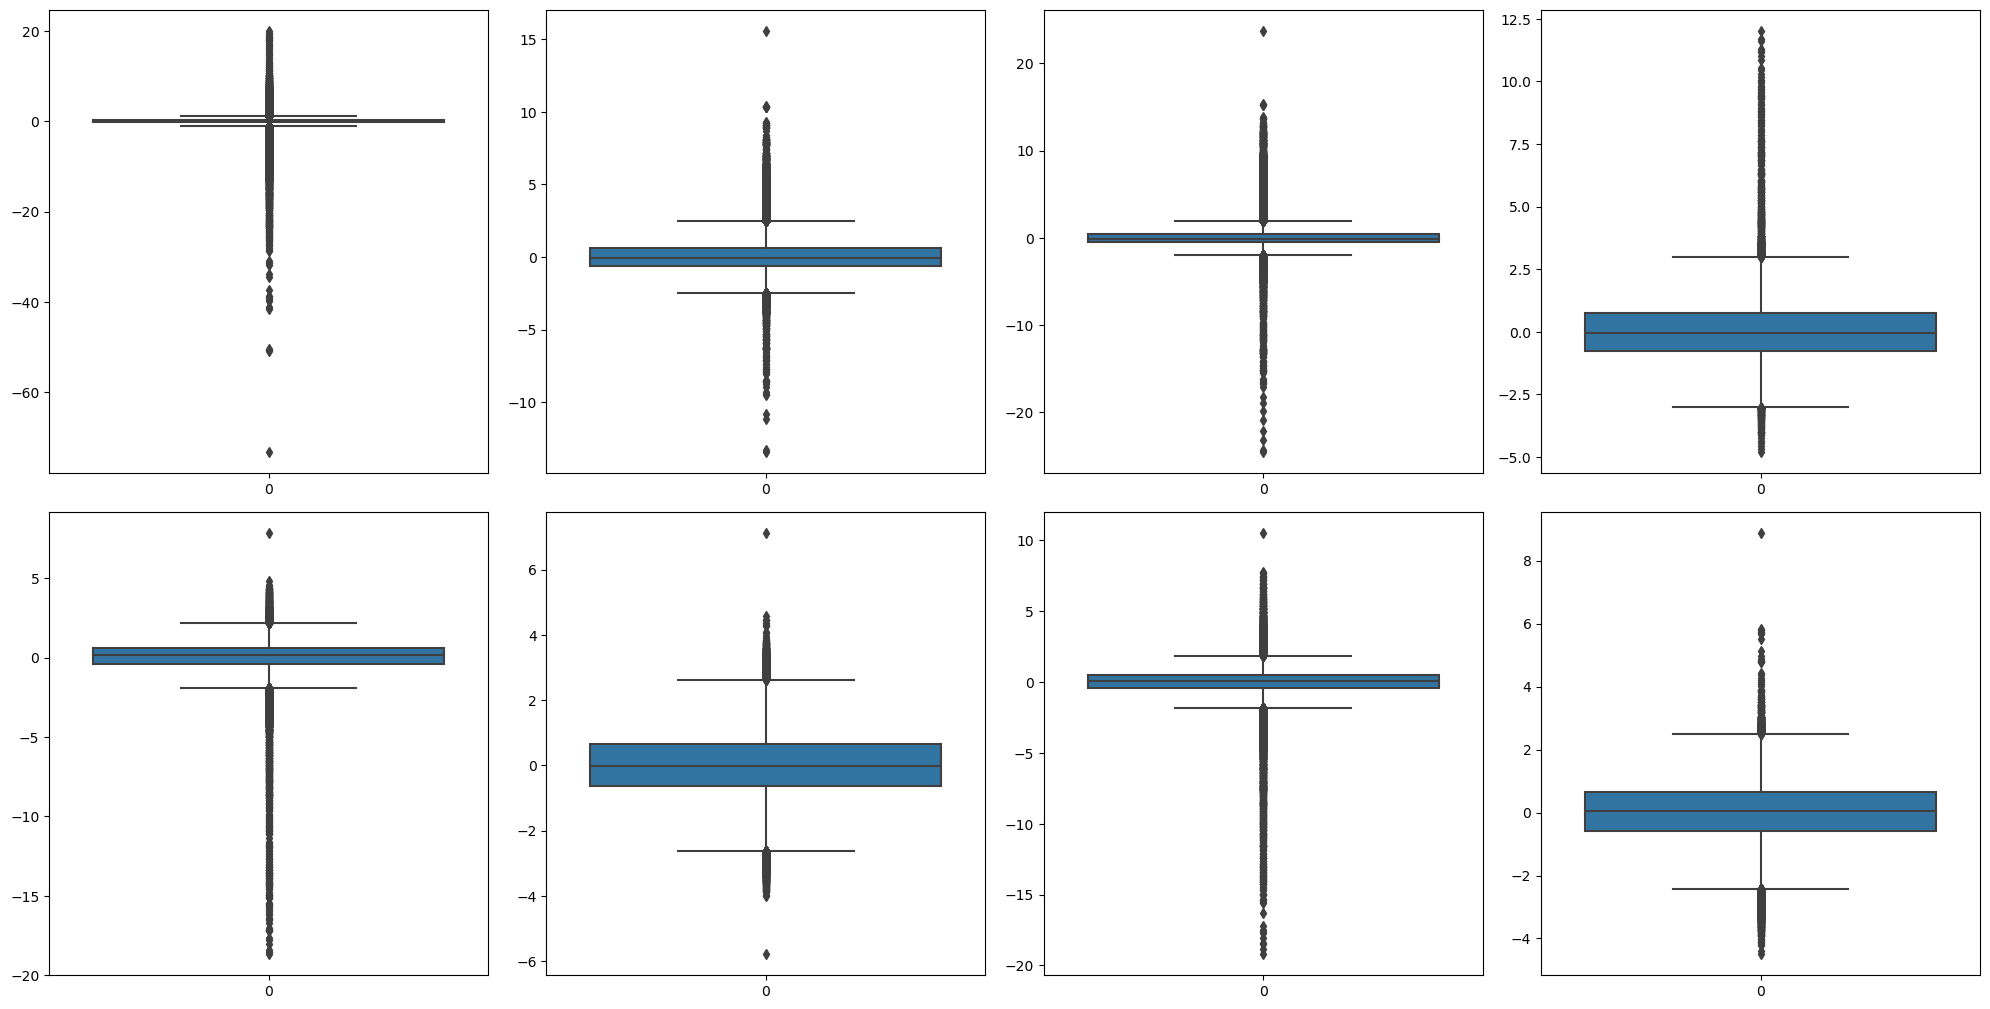

In [39]:
plt.figure(figsize = (20, 20))
plotnumber = 1
for column in df.columns[8:16]:
    if plotnumber <= 8:
        ax = plt.subplot(4, 4, plotnumber)
        sns.boxplot(df[column])
        plt.tight_layout()

    plotnumber += 1

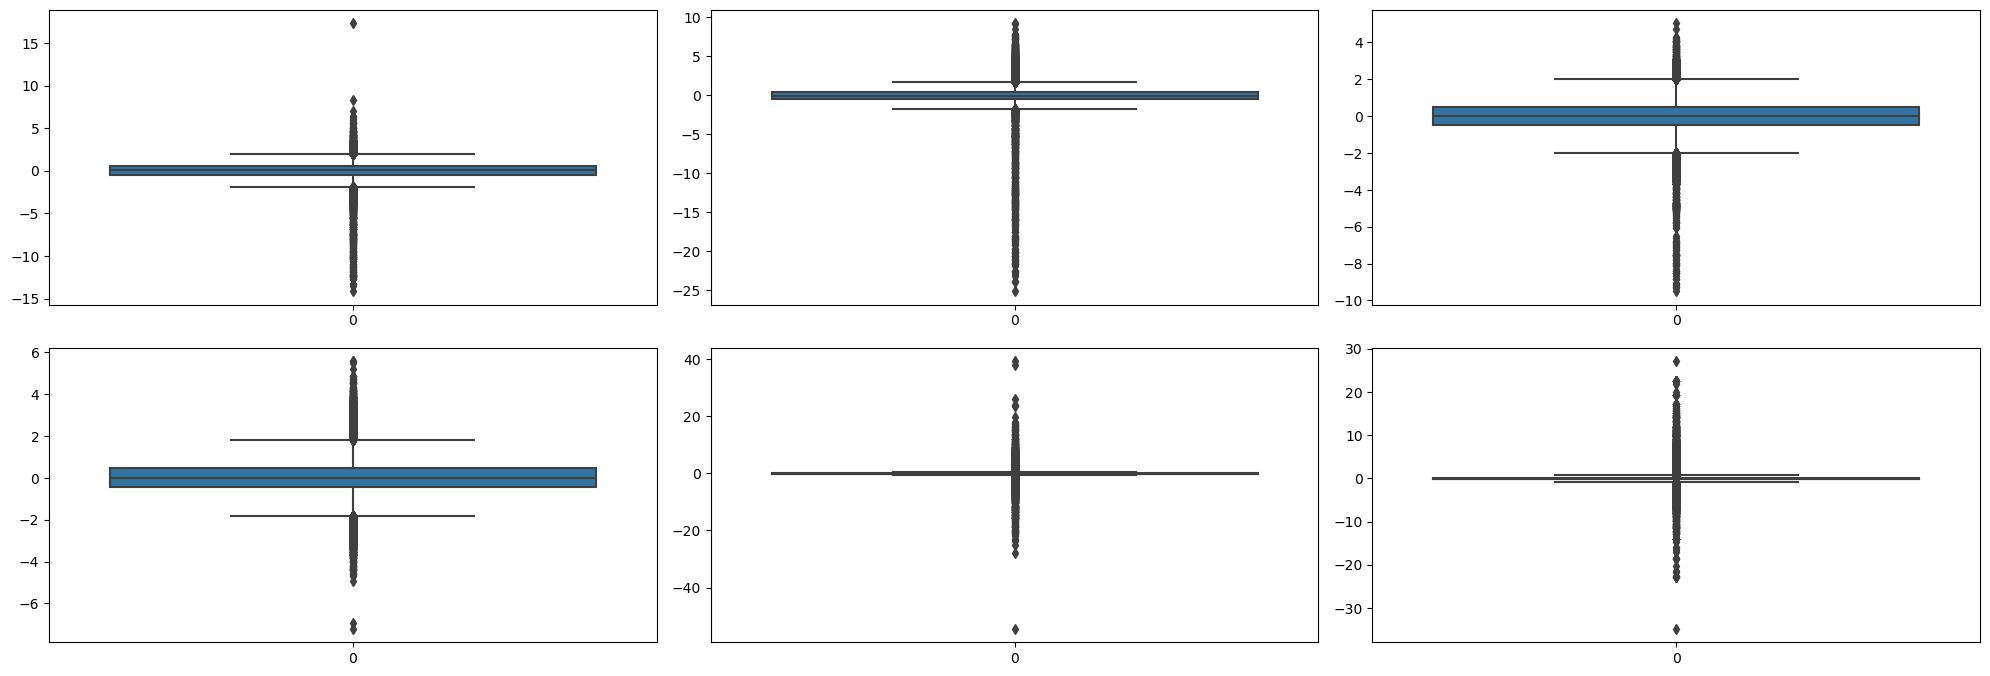

In [40]:
plt.figure(figsize = (20, 10))
plotnumber = 1
for column in df.columns[16:24]:
    if plotnumber <= 6:
        ax = plt.subplot(3, 3, plotnumber)
        sns.boxplot(df[column])
        plt.tight_layout()

    plotnumber += 1

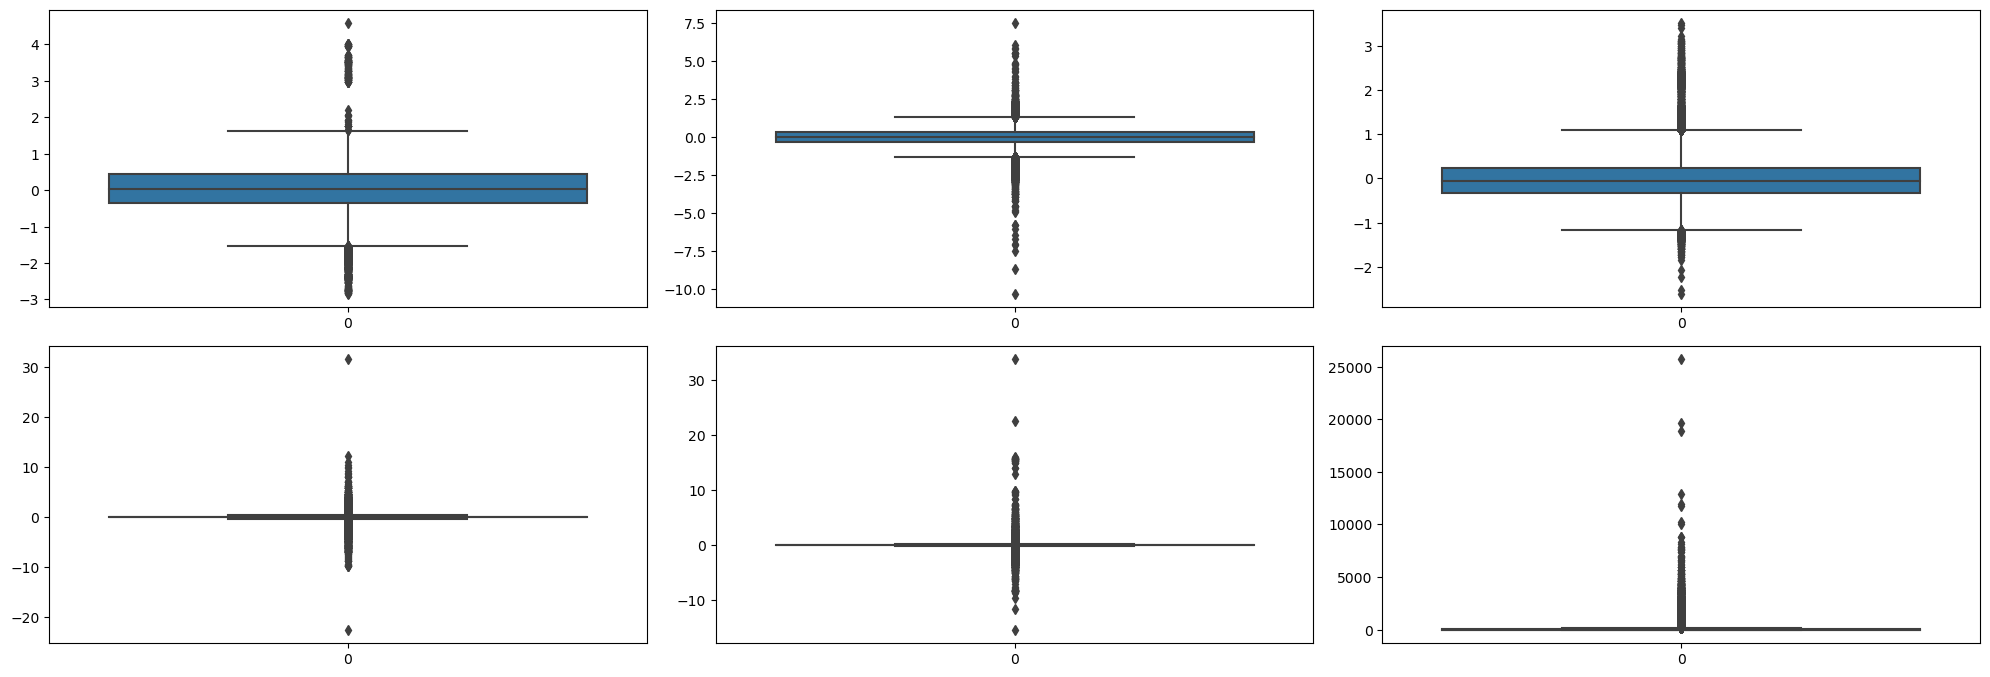

In [41]:
plt.figure(figsize = (20, 10))
plotnumber = 1
for column in df.columns[24:30]:
    if plotnumber <= 6:
        ax = plt.subplot(3, 3, plotnumber)
        sns.boxplot(df[column])
        plt.tight_layout()

    plotnumber += 1

In [42]:
#### eventhough outliers place major role in results,
#### but here the points are very close, so datas are directly used for further updates

#### Multi-variant analysis

<Axes: xlabel='Amount', ylabel='V1'>

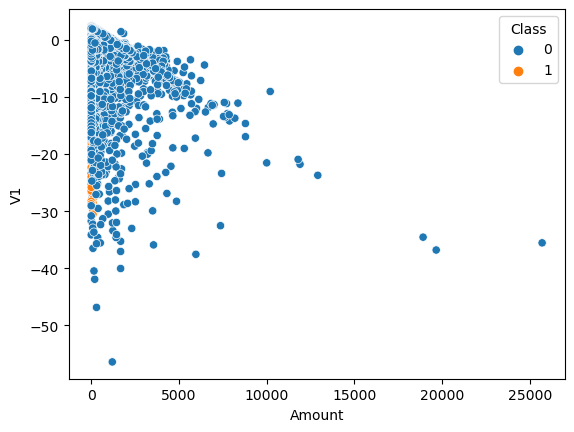

In [43]:
# sample plot for fraud/normal transaction based on features (V1)
sns.scatterplot(x="Amount", y="V1",hue="Class",data=df)

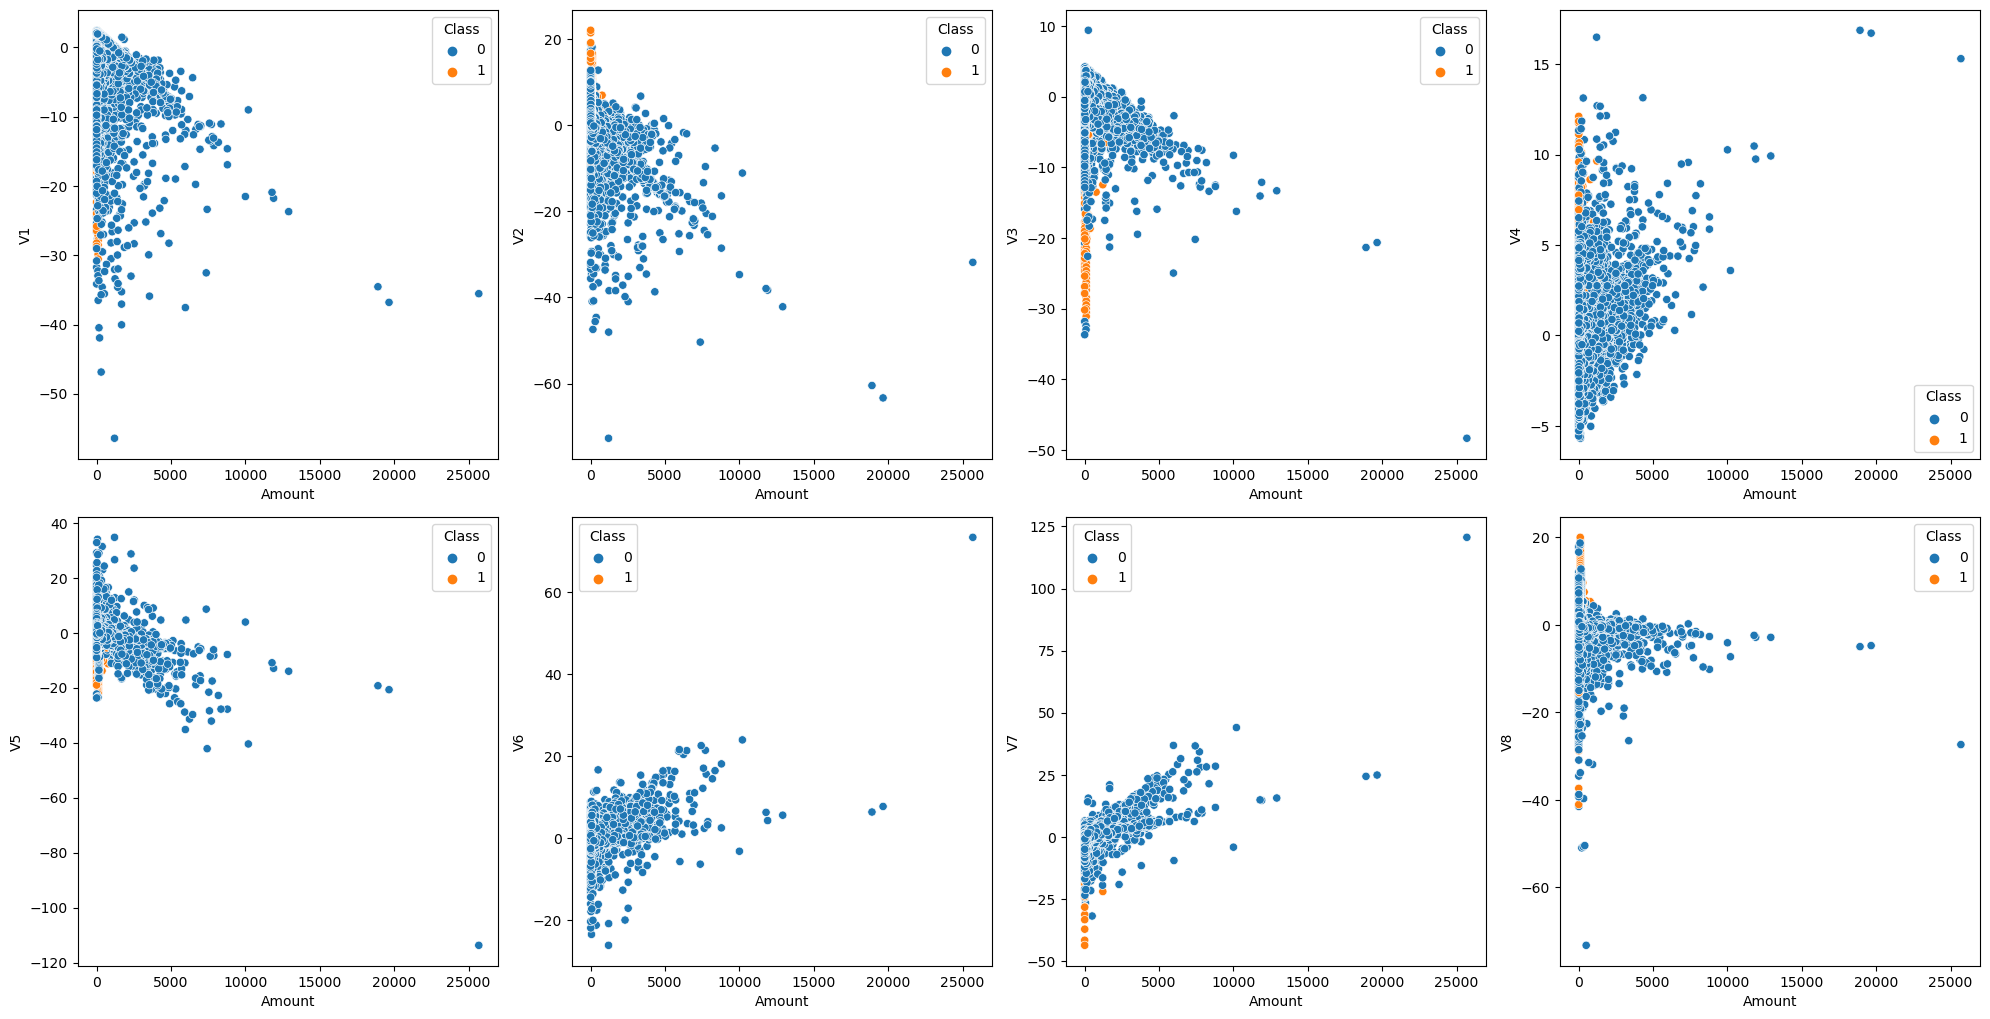

In [44]:
plt.figure(figsize = (20, 20))
plotnumber = 1
for column in df.columns[1:9]:
    if plotnumber <= 8:
        ax = plt.subplot(4, 4, plotnumber)
        sns.scatterplot(x= 'Amount',y= column, data=df, hue='Class')
        plt.tight_layout()

    plotnumber += 1

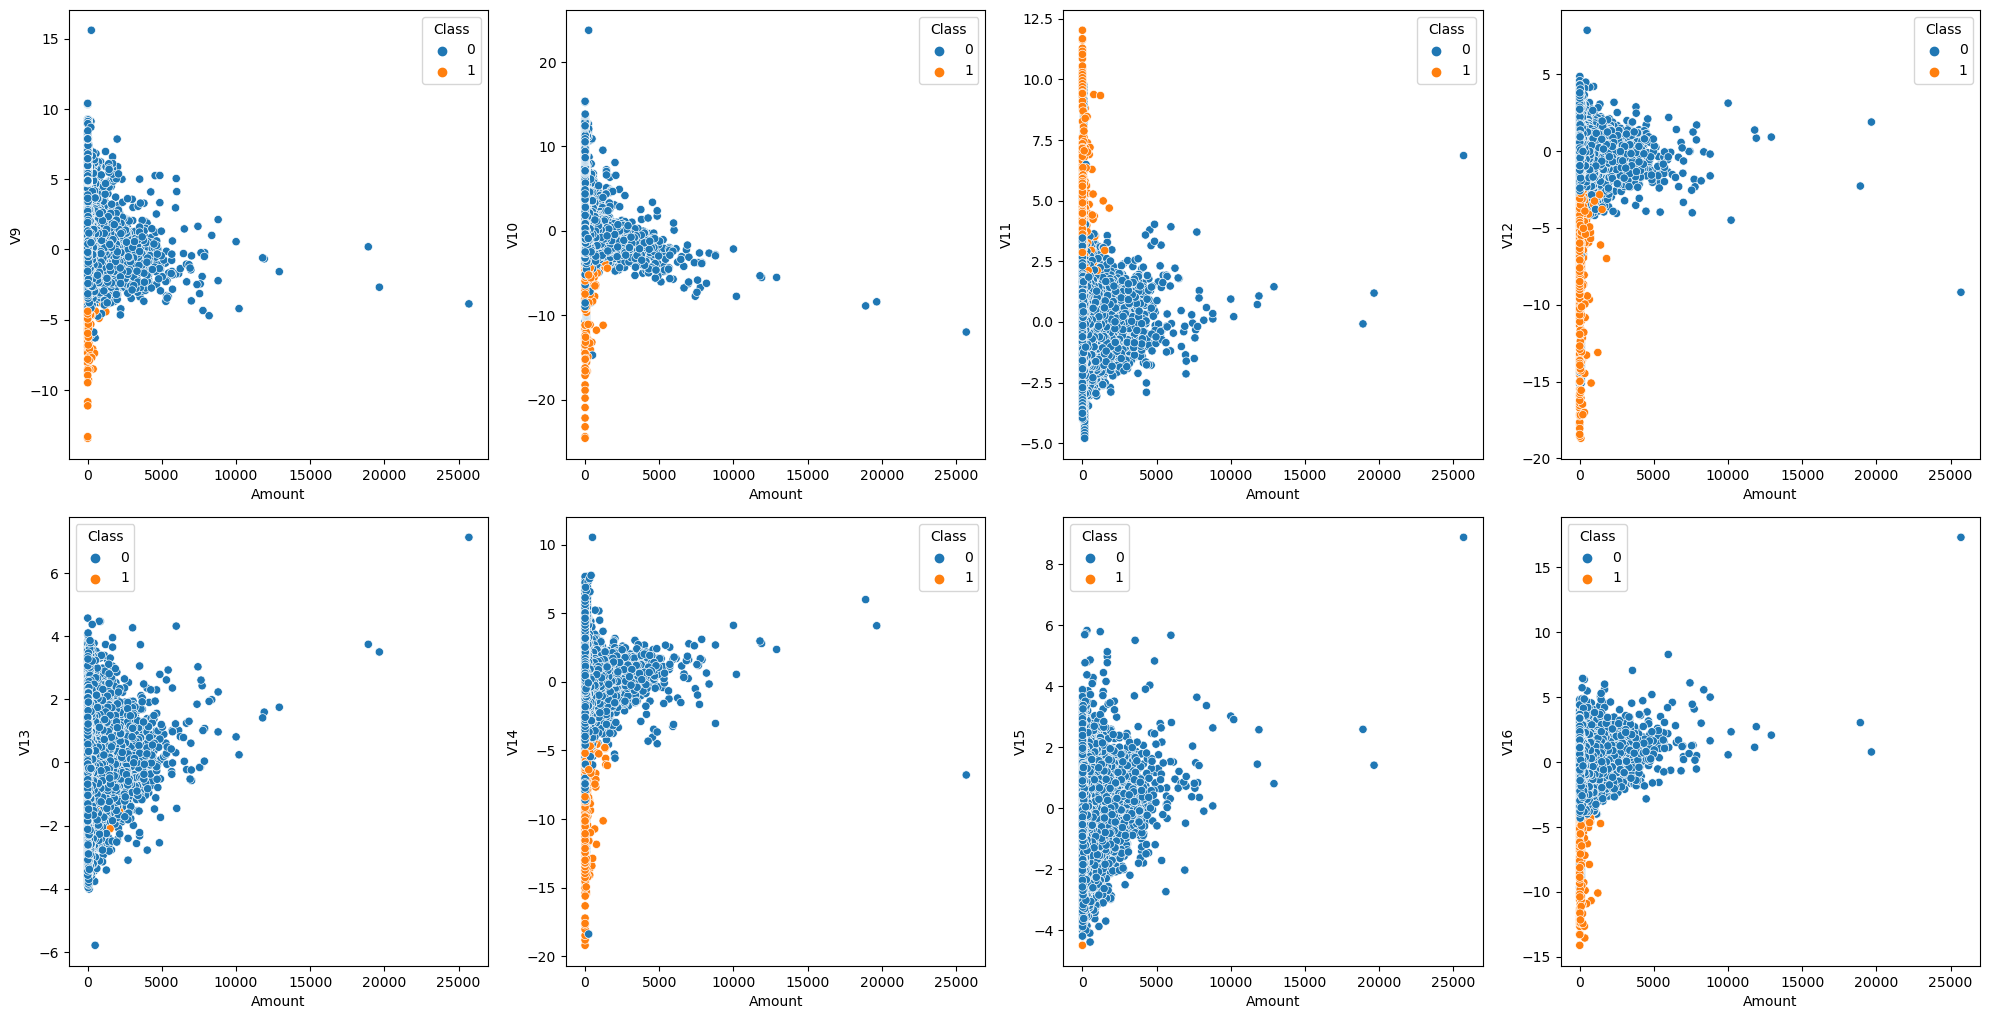

In [45]:
plt.figure(figsize = (20, 20))
plotnumber = 1
for column in df.columns[9:17]:
    if plotnumber <= 8:
        ax = plt.subplot(4, 4, plotnumber)
        sns.scatterplot(x= 'Amount',y= column, data=df, hue='Class')
        plt.tight_layout()

    plotnumber += 1

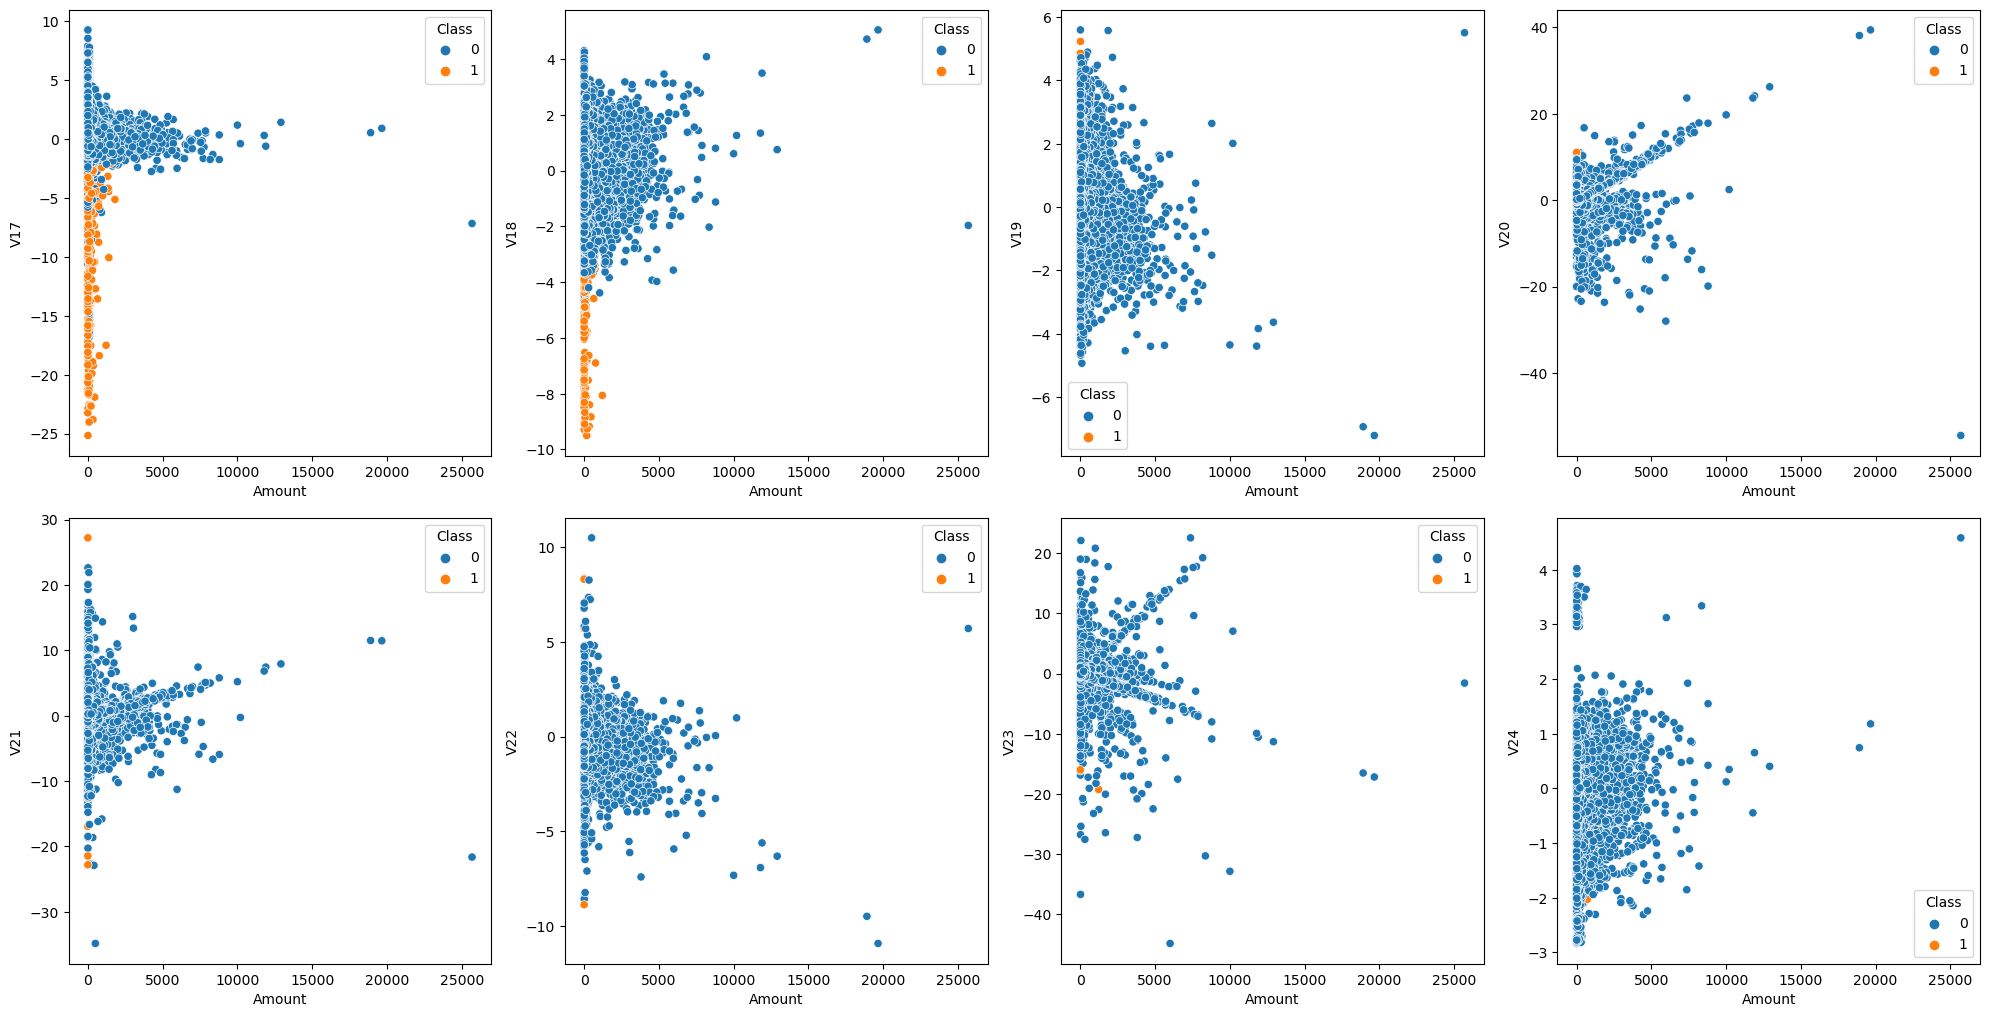

In [46]:
plt.figure(figsize = (20, 20))
plotnumber = 1
for column in df.columns[17:25]:
    if plotnumber <= 8:
        ax = plt.subplot(4, 4, plotnumber)
        sns.scatterplot(x= 'Amount',y= column, data=df, hue='Class')
        plt.tight_layout()

    plotnumber += 1

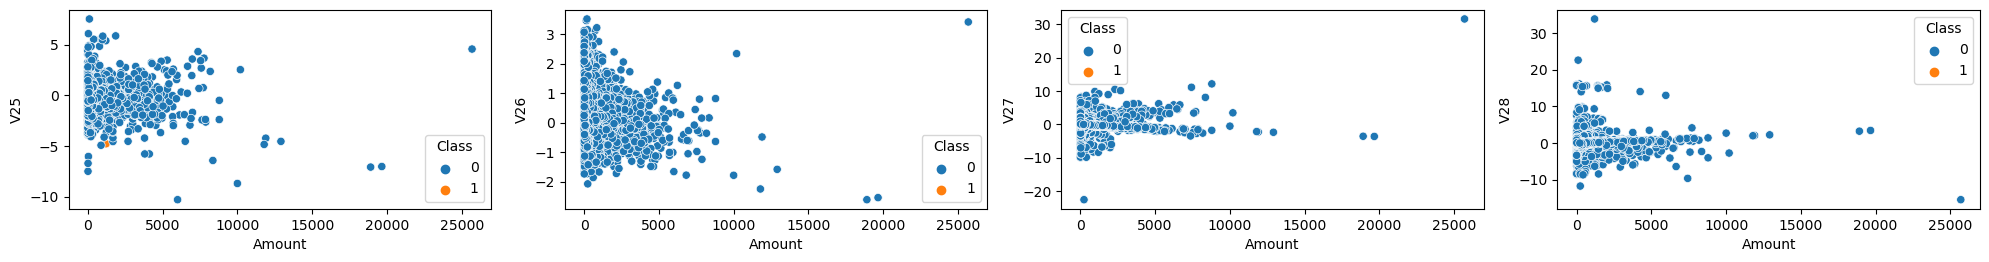

In [47]:
plt.figure(figsize = (20, 10))
plotnumber = 1
for column in df.columns[25:29]:
    if plotnumber <= 4:
        ax = plt.subplot(4, 4, plotnumber)
        sns.scatterplot(x= 'Amount',y= column, data=df, hue='Class')
        plt.tight_layout()

    plotnumber += 1

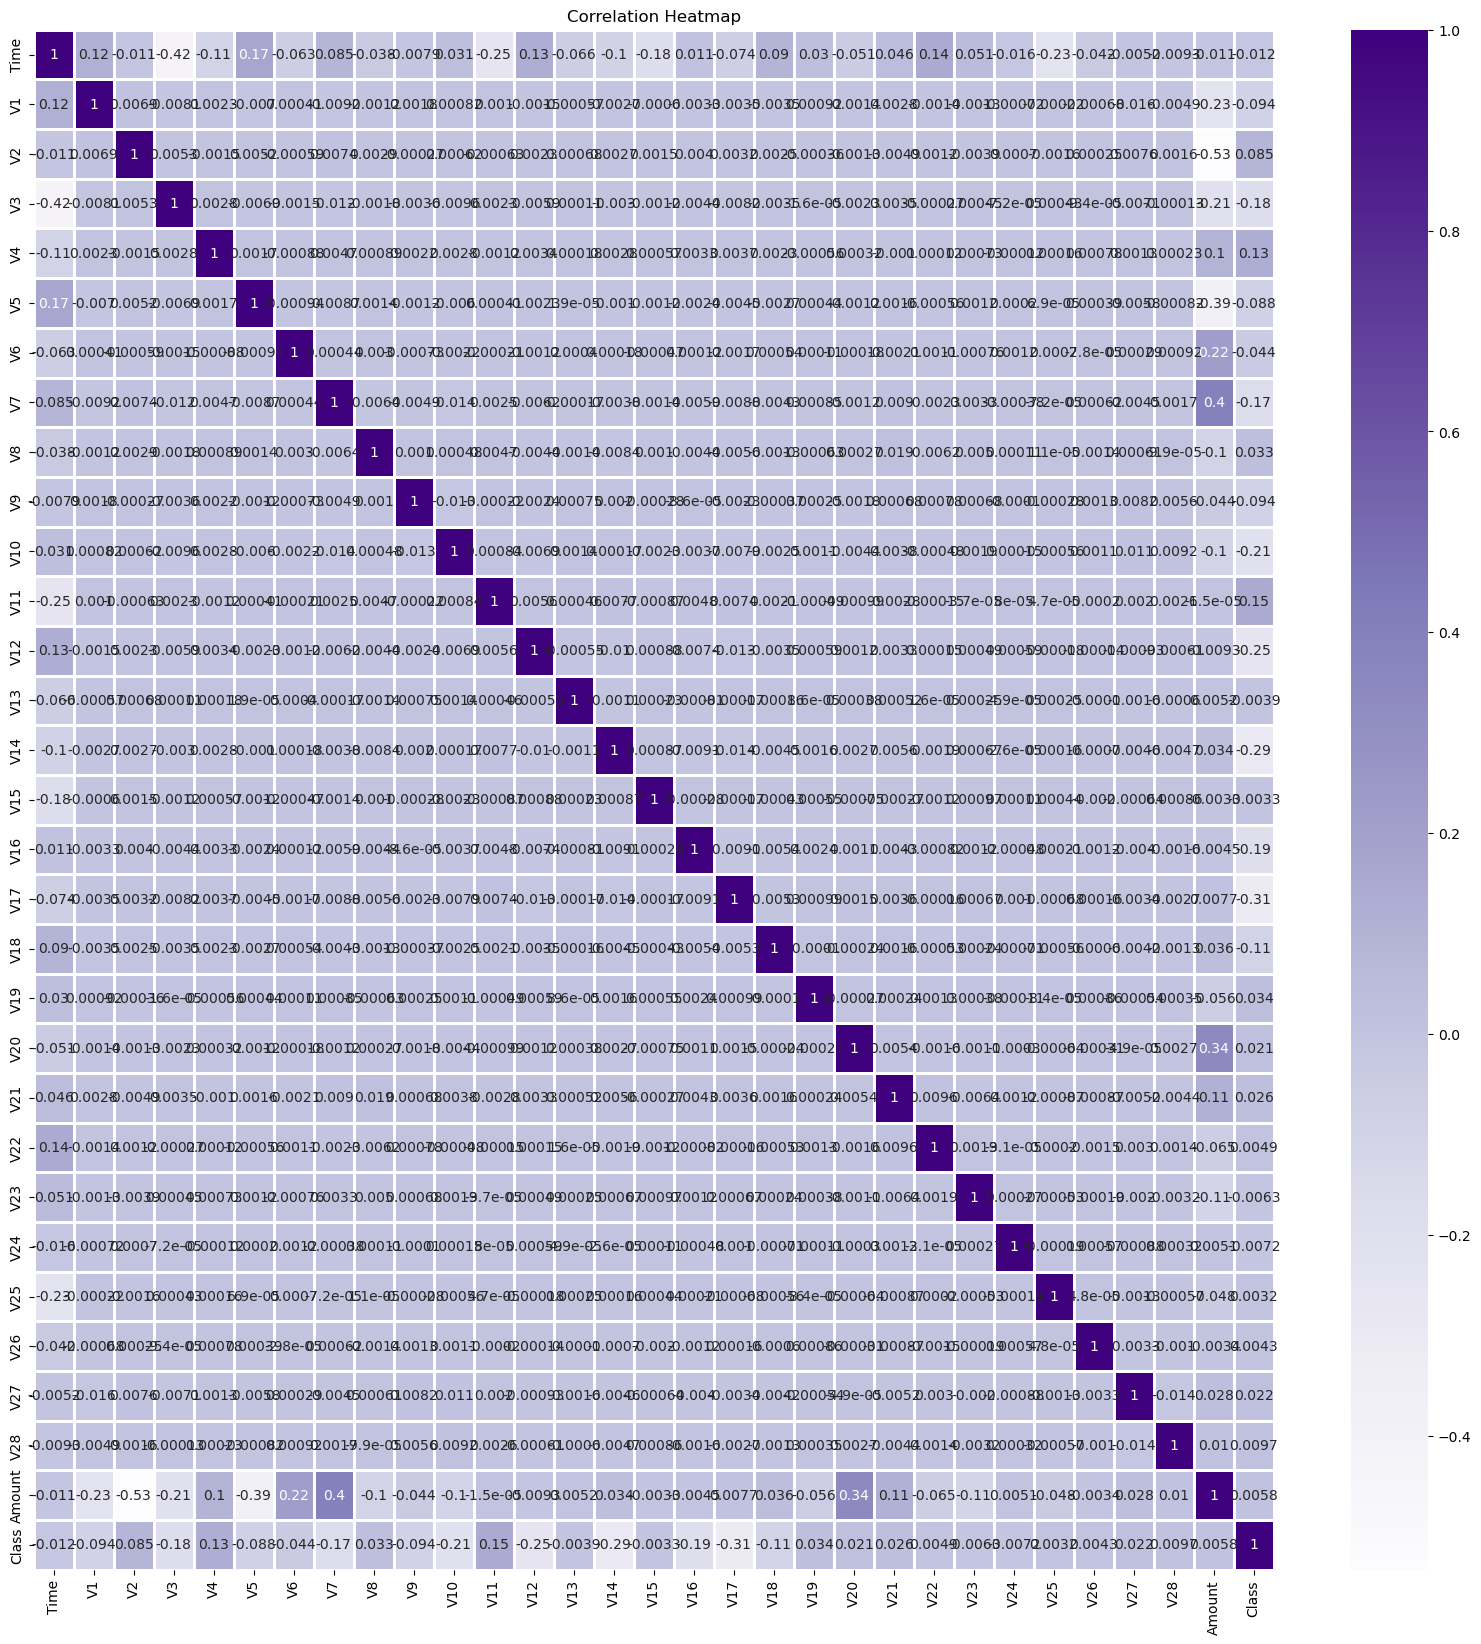

In [48]:
#checking of highly correlated features
heatmap_data = df[df.columns.values]

correlation_matrix = heatmap_data.corr()

plt.figure(figsize=(20, 20))

sns.heatmap(correlation_matrix, annot=True, cmap='Purples', linewidths=1)

plt.title('Correlation Heatmap')
plt.show()

## Handling the class IMBALANCE

### i) UNDER SAMPLING

In [49]:
df = pd.read_csv("creditcard.csv")
df = df.drop_duplicates()
df.shape

(283726, 31)

In [50]:
df.Class.value_counts()

0    283253
1       473
Name: Class, dtype: int64

In [51]:
normal_df = normal.sample(n=473)
normal_df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
37148,38824.0,-0.373712,0.879100,1.584204,0.730073,0.220148,-0.048297,0.755746,0.040145,-0.452268,...,-0.085336,-0.150197,-0.035009,0.072911,0.052683,-0.511399,0.065069,0.031674,31.70,0
151330,95412.0,-0.751565,1.376932,-1.255435,-2.591689,1.170273,-1.533017,1.347058,-0.157823,0.856605,...,0.172792,0.694989,-0.230877,-0.450958,-0.232531,0.465203,-0.110028,0.169266,6.00,0
68572,53048.0,1.063546,-1.166890,1.121836,-0.643700,-1.648718,0.091281,-1.141965,0.113640,-0.625782,...,-0.043799,0.113872,-0.101512,0.090032,-0.038641,1.099663,-0.023473,0.038632,136.88,0
26427,34060.0,1.151067,-0.751338,-0.161611,-0.826844,-0.473285,-0.281112,-0.181406,-0.054608,-1.333095,...,-0.078309,-0.617082,0.007129,-0.320462,0.248256,-0.509543,-0.024985,0.016979,124.00,0
270810,164265.0,1.854589,-0.117630,-1.738265,1.456913,0.305014,-1.093441,0.716502,-0.398133,0.305083,...,0.092999,0.253405,-0.083311,-0.093262,0.409104,-0.492538,-0.036928,-0.048198,101.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219568,141778.0,-0.070848,0.898975,-0.643690,-0.754945,1.208210,-0.292678,0.826150,-0.032438,-0.151271,...,-0.211142,-0.692041,0.155709,0.075218,-0.847781,0.026696,-0.193418,0.093665,0.89,0
100023,67388.0,0.972306,-0.473108,1.349094,1.003920,-1.317733,-0.144186,-0.666614,0.212478,1.025875,...,0.000149,0.031127,0.079429,0.619838,0.054037,0.309816,0.015507,0.038672,74.99,0
208933,137335.0,2.180021,-0.909811,-0.746306,-1.004256,-0.790322,-0.370300,-0.933386,-0.044190,-0.252782,...,0.235208,0.753246,0.113407,-0.461066,-0.124960,-0.167617,0.000564,-0.065521,3.50,0
121015,76044.0,1.218131,0.055826,-0.209563,0.574347,-0.129094,-0.898507,0.317160,-0.238922,0.064129,...,-0.069884,-0.326366,-0.155817,-0.101521,0.585736,0.396147,-0.068245,0.007878,56.00,0


In [52]:
fraud

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


In [53]:
df_undersampling = pd.concat([normal_df,fraud],axis = 0)
df_undersampling

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
37148,38824.0,-0.373712,0.879100,1.584204,0.730073,0.220148,-0.048297,0.755746,0.040145,-0.452268,...,-0.085336,-0.150197,-0.035009,0.072911,0.052683,-0.511399,0.065069,0.031674,31.70,0
151330,95412.0,-0.751565,1.376932,-1.255435,-2.591689,1.170273,-1.533017,1.347058,-0.157823,0.856605,...,0.172792,0.694989,-0.230877,-0.450958,-0.232531,0.465203,-0.110028,0.169266,6.00,0
68572,53048.0,1.063546,-1.166890,1.121836,-0.643700,-1.648718,0.091281,-1.141965,0.113640,-0.625782,...,-0.043799,0.113872,-0.101512,0.090032,-0.038641,1.099663,-0.023473,0.038632,136.88,0
26427,34060.0,1.151067,-0.751338,-0.161611,-0.826844,-0.473285,-0.281112,-0.181406,-0.054608,-1.333095,...,-0.078309,-0.617082,0.007129,-0.320462,0.248256,-0.509543,-0.024985,0.016979,124.00,0
270810,164265.0,1.854589,-0.117630,-1.738265,1.456913,0.305014,-1.093441,0.716502,-0.398133,0.305083,...,0.092999,0.253405,-0.083311,-0.093262,0.409104,-0.492538,-0.036928,-0.048198,101.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


In [54]:
df_undersampling.Class.value_counts()

0    473
1    473
Name: Class, dtype: int64

In [55]:
df_undersampling.drop('Time',axis = 1, inplace = True)
df_undersampling

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
37148,-0.373712,0.879100,1.584204,0.730073,0.220148,-0.048297,0.755746,0.040145,-0.452268,-0.564960,...,-0.085336,-0.150197,-0.035009,0.072911,0.052683,-0.511399,0.065069,0.031674,31.70,0
151330,-0.751565,1.376932,-1.255435,-2.591689,1.170273,-1.533017,1.347058,-0.157823,0.856605,-1.271117,...,0.172792,0.694989,-0.230877,-0.450958,-0.232531,0.465203,-0.110028,0.169266,6.00,0
68572,1.063546,-1.166890,1.121836,-0.643700,-1.648718,0.091281,-1.141965,0.113640,-0.625782,0.702396,...,-0.043799,0.113872,-0.101512,0.090032,-0.038641,1.099663,-0.023473,0.038632,136.88,0
26427,1.151067,-0.751338,-0.161611,-0.826844,-0.473285,-0.281112,-0.181406,-0.054608,-1.333095,0.705735,...,-0.078309,-0.617082,0.007129,-0.320462,0.248256,-0.509543,-0.024985,0.016979,124.00,0
270810,1.854589,-0.117630,-1.738265,1.456913,0.305014,-1.093441,0.716502,-0.398133,0.305083,0.236383,...,0.092999,0.253405,-0.083311,-0.093262,0.409104,-0.492538,-0.036928,-0.048198,101.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,-5.587794,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,-3.232153,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,-3.463891,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,-5.245984,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


### scaling - STANDARD SCALER

In [56]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df_undersampling['Amount'] = sc.fit_transform(pd.DataFrame(df_undersampling['Amount']))

In [57]:
X = df_undersampling.drop(['Class'],axis = 1)
y = df_undersampling.Class

In [58]:
X

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
37148,-0.373712,0.879100,1.584204,0.730073,0.220148,-0.048297,0.755746,0.040145,-0.452268,-0.564960,...,-0.022553,-0.085336,-0.150197,-0.035009,0.072911,0.052683,-0.511399,0.065069,0.031674,-0.304072
151330,-0.751565,1.376932,-1.255435,-2.591689,1.170273,-1.533017,1.347058,-0.157823,0.856605,-1.271117,...,-0.287992,0.172792,0.694989,-0.230877,-0.450958,-0.232531,0.465203,-0.110028,0.169266,-0.418307
68572,1.063546,-1.166890,1.121836,-0.643700,-1.648718,0.091281,-1.141965,0.113640,-0.625782,0.702396,...,-0.093516,-0.043799,0.113872,-0.101512,0.090032,-0.038641,1.099663,-0.023473,0.038632,0.163448
26427,1.151067,-0.751338,-0.161611,-0.826844,-0.473285,-0.281112,-0.181406,-0.054608,-1.333095,0.705735,...,0.283851,-0.078309,-0.617082,0.007129,-0.320462,0.248256,-0.509543,-0.024985,0.016979,0.106197
270810,1.854589,-0.117630,-1.738265,1.456913,0.305014,-1.093441,0.716502,-0.398133,0.305083,0.236383,...,-0.157635,0.092999,0.253405,-0.083311,-0.093262,0.409104,-0.492538,-0.036928,-0.048198,0.003963
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,-5.587794,...,1.252967,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,1.288555
280143,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,-3.232153,...,0.226138,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,-0.441599
280149,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,-3.463891,...,0.247968,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,-0.098759
281144,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,-5.245984,...,0.306271,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,0.644037


In [59]:
y

37148     0
151330    0
68572     0
26427     0
270810    0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 946, dtype: int64

#### splitting of data set into testing and training

In [60]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X,y,
                                                   test_size = 0.2,
                                                   random_state=1,
                                                   shuffle=True)

In [61]:
print('X_train : ',X_train.shape)  
print('') 
print('X_test : ',X_test.shape) 
print('') 
print('y_train : ',y_train.shape)  
print('') 
print('y_test : ',y_test.shape) 


X_train :  (756, 29)

X_test :  (190, 29)

y_train :  (756,)

y_test :  (190,)


#### Model builing

In [62]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [63]:
from sklearn.metrics import accuracy_score,recall_score,precision_score, f1_score, confusion_matrix, classification_report
prediction =  lr.predict(X_test)
accuracy = accuracy_score(y_test,prediction)
accuracy

0.9526315789473684

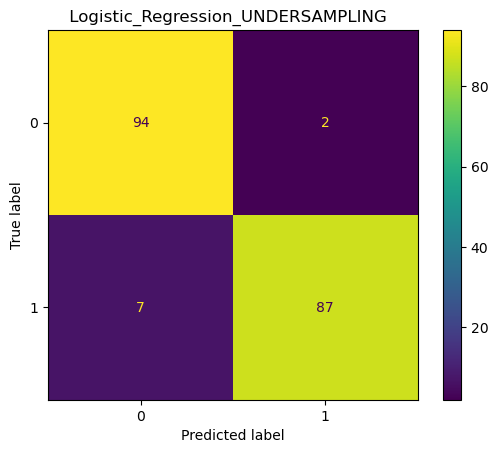

In [64]:
from sklearn import metrics
cm = confusion_matrix(y_test,prediction)
cm_display = metrics.ConfusionMatrixDisplay(cm)
cm_display.plot()
plt.title("         Logistic_Regression_UNDERSAMPLING           ")
plt.show()

In [65]:
print('______________Classification Report - Logistic regression_US________________')
print('')

print(classification_report(y_test,prediction))

lr_us_accuracy = accuracy_score(y_test,prediction)
print("Accuracy_us: %f" % lr_us_accuracy)

lr_us_precision = precision_score(y_test,prediction)
print("Precision_us: %f" % lr_us_precision)

lr_us_recall = recall_score(y_test,prediction)
print("Recall_us: %f" % lr_us_recall)

lr_us_f1_score = f1_score(y_test,prediction)
print("F1_score_us: %f" % lr_us_f1_score)

______________Classification Report - Logistic regression_US________________

              precision    recall  f1-score   support

           0       0.93      0.98      0.95        96
           1       0.98      0.93      0.95        94

    accuracy                           0.95       190
   macro avg       0.95      0.95      0.95       190
weighted avg       0.95      0.95      0.95       190

Accuracy_us: 0.952632
Precision_us: 0.977528
Recall_us: 0.925532
F1_score_us: 0.950820


### ii) OVER SAMPLING

In [2]:
df = pd.read_csv("creditcard.csv")
df = df.drop_duplicates()

df.drop(['Time'],axis = 1,inplace = True)
df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


#### scaling - STANDARD SCALER

In [3]:
df_oversampling = df

In [4]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

df_oversampling['Amount'] = sc.fit_transform(pd.DataFrame(df_oversampling['Amount']))
df_oversampling

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244200,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342584,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.158900,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.139886,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073813,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,-0.350252,0
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,-0.254325,0
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,-0.082239,0
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,-0.313391,0


In [5]:
import joblib # Save the scaler object to a file
joblib.dump(sc, 'scaler_oversampling.pkl')

['scaler_oversampling.pkl']

In [6]:
X = df_oversampling.drop(['Class'],axis = 1)
y = df_oversampling.Class

In [7]:
X.shape

(283726, 29)

In [8]:
y.value_counts()

0    283253
1       473
Name: Class, dtype: int64

In [9]:
from imblearn.over_sampling import SMOTE
X_res, y_res = SMOTE().fit_resample(X,y)

In [10]:
X_res.shape

(566506, 29)

In [11]:
y_res.value_counts()

0    283253
1    283253
Name: Class, dtype: int64

#### splitting of data set into testing and training

In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X_res,y_res,
                                                   test_size = 0.2,
                                                   random_state=1,
                                                   shuffle=True)

In [13]:
print('X_train : ',X_train.shape)  
print('') 
print('X_test : ',X_test.shape) 
print('') 
print('y_train : ',y_train.shape)  
print('') 
print('y_test : ',y_test.shape) 


X_train :  (453204, 29)

X_test :  (113302, 29)

y_train :  (453204,)

y_test :  (113302,)


## MODEL BUILDING

### Model 1 - Logistic Regression

In [77]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [78]:
from sklearn.metrics import accuracy_score,recall_score,precision_score, f1_score, confusion_matrix, classification_report

prediction = lr.predict(X_test)
accuracy = accuracy_score(y_test,prediction)
accuracy

0.9436903143810348

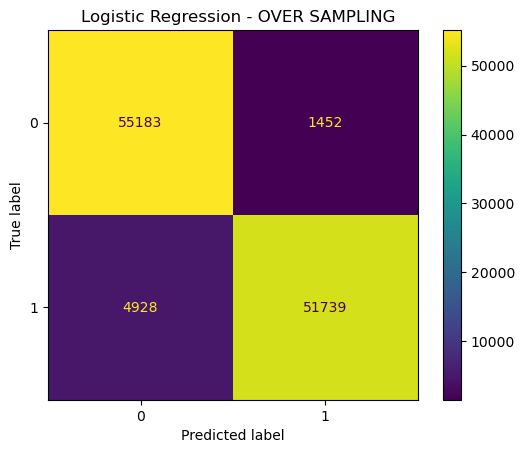

In [79]:
cm = confusion_matrix(y_test,prediction)
cm_display = metrics.ConfusionMatrixDisplay(cm)
cm_display.plot()
plt.title("        Logistic Regression - OVER SAMPLING      ")
plt.show()

In [80]:
print("____________Classification Report - Logistic regression_OS______________")
print('')

print(classification_report(y_test,prediction))

lr_accuracy = accuracy_score(y_test,prediction)
print("LR_accuracy: %f" % lr_accuracy)

lr_precision = precision_score(y_test,prediction)
print("LR_precision: %f" % lr_precision)

lr_recall = recall_score(y_test,prediction)
print("LR_recall: %f" % lr_recall)

lr_f1_score = f1_score(y_test,prediction)
print("LR_f1_score: %f" % lr_f1_score)

____________Classification Report - Logistic regression_OS______________

              precision    recall  f1-score   support

           0       0.92      0.97      0.95     56635
           1       0.97      0.91      0.94     56667

    accuracy                           0.94    113302
   macro avg       0.95      0.94      0.94    113302
weighted avg       0.95      0.94      0.94    113302

LR_accuracy: 0.943690
LR_precision: 0.972702
LR_recall: 0.913036
LR_f1_score: 0.941925


### Model 2 - Naive Byes

In [81]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train,y_train)

GaussianNB()

In [82]:
from sklearn.metrics import accuracy_score,recall_score,precision_score, f1_score, confusion_matrix, classification_report

prediction = nb.predict(X_test)
accuracy = accuracy_score(y_test,prediction)
accuracy

0.9111842685919048

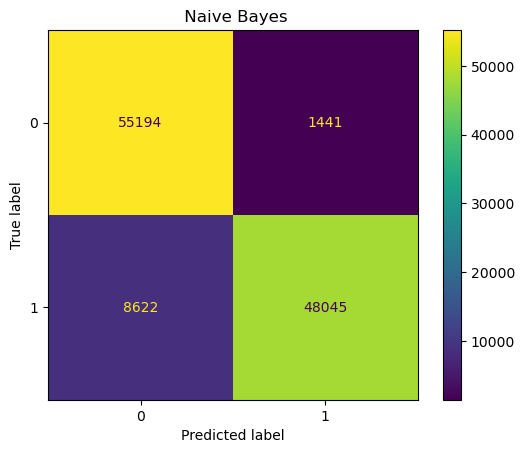

In [83]:
from sklearn import metrics

cm = confusion_matrix(y_test,prediction)
cm_display = metrics.ConfusionMatrixDisplay(cm)
cm_display.plot()
plt.title("         Naive Bayes        ")
plt.show()

In [84]:
print("____________Classification Report - Naive Bayes______________")
print('')

print(classification_report(y_test,prediction))

nb_accuracy = accuracy_score(y_test,prediction)
print("NB_accuracy: %f" % nb_accuracy)

nb_precision = precision_score(y_test,prediction)
print("NB_precision: %f" % nb_precision)

nb_recall = recall_score(y_test,prediction)
print("NB_recall: %f" % nb_recall)

nb_f1_score = f1_score(y_test,prediction)
print("NB_f1_score: %f" % nb_f1_score)

____________Classification Report - Naive Bayes______________

              precision    recall  f1-score   support

           0       0.86      0.97      0.92     56635
           1       0.97      0.85      0.91     56667

    accuracy                           0.91    113302
   macro avg       0.92      0.91      0.91    113302
weighted avg       0.92      0.91      0.91    113302

NB_accuracy: 0.911184
NB_precision: 0.970881
NB_recall: 0.847848
NB_f1_score: 0.905203


### Model 3 - Decision Tree

In [85]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [86]:
from sklearn.metrics import accuracy_score,recall_score,precision_score, f1_score, confusion_matrix, classification_report

prediction = dt.predict(X_test)
accuracy = accuracy_score(y_test,prediction)
accuracy

0.9979876789465323

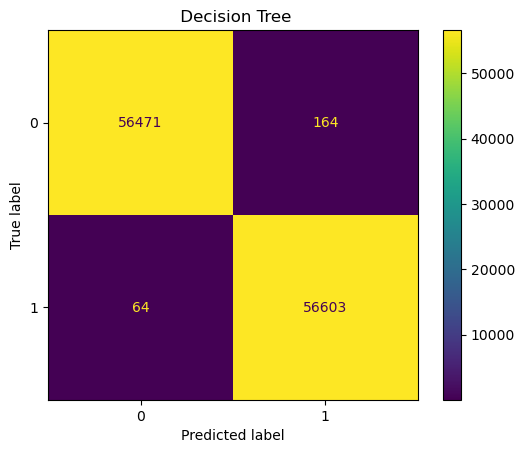

In [87]:
from sklearn import metrics

cm = confusion_matrix(y_test,prediction)
cm_display = metrics.ConfusionMatrixDisplay(cm)
cm_display.plot()
plt.title("         Decision Tree        ")
plt.show()

In [88]:
print("____________Classification Report - Decision Tree______________")
print('')

print(classification_report(y_test,prediction))

dt_accuracy = accuracy_score(y_test,prediction)
print("DT_accuracy: %f" % dt_accuracy)

dt_precision = precision_score(y_test,prediction)
print("DT_precision: %f" % dt_precision)

dt_recall = recall_score(y_test,prediction)
print("DT_recall: %f" % dt_recall)

dt_f1_score = f1_score(y_test,prediction)
print("DT_f1_score: %f" % dt_f1_score)

____________Classification Report - Decision Tree______________

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56635
           1       1.00      1.00      1.00     56667

    accuracy                           1.00    113302
   macro avg       1.00      1.00      1.00    113302
weighted avg       1.00      1.00      1.00    113302

DT_accuracy: 0.997988
DT_precision: 0.997111
DT_recall: 0.998871
DT_f1_score: 0.997990


### Model 4 - Random Forest

In [89]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [90]:
from sklearn.metrics import accuracy_score,recall_score,precision_score, f1_score, confusion_matrix, classification_report

prediction = rf.predict(X_test)
accuracy = accuracy_score(y_test,prediction)
accuracy

0.9998764364265414

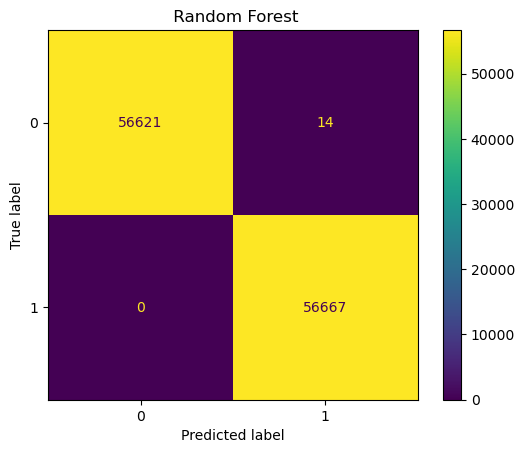

In [91]:
from sklearn import metrics

cm = confusion_matrix(y_test,prediction)
cm_display = metrics.ConfusionMatrixDisplay(cm)
cm_display.plot()
plt.title("         Random Forest        ")
plt.show()

In [92]:
print("____________Classification Report - Random Forest______________")
print('')

print(classification_report(y_test,prediction))

rf_accuracy = accuracy_score(y_test,prediction)
print("RF_accuracy: %f" % rf_accuracy)

rf_precision = precision_score(y_test,prediction)
print("RF_precision: %f" % rf_precision)

rf_recall = recall_score(y_test,prediction)
print("RF_recall: %f" % rf_recall)

rf_f1_score = f1_score(y_test,prediction)
print("RF_f1_score: %f" % rf_f1_score)

____________Classification Report - Random Forest______________

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56635
           1       1.00      1.00      1.00     56667

    accuracy                           1.00    113302
   macro avg       1.00      1.00      1.00    113302
weighted avg       1.00      1.00      1.00    113302

RF_accuracy: 0.999876
RF_precision: 0.999753
RF_recall: 1.000000
RF_f1_score: 0.999876


### Model 5 - K-nearest neighbours

In [93]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [94]:
from sklearn.metrics import accuracy_score,recall_score,precision_score, f1_score, confusion_matrix, classification_report

prediction = knn.predict(X_test)
accuracy = accuracy_score(y_test,prediction)
accuracy

0.9990732731990609

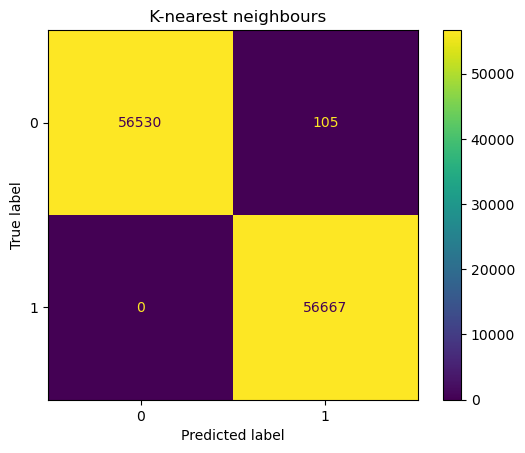

In [95]:
from sklearn import metrics

cm = confusion_matrix(y_test,prediction)
cm_display = metrics.ConfusionMatrixDisplay(cm)
cm_display.plot()
plt.title("         K-nearest neighbours       ")
plt.show()

In [96]:
print("____________Classification Report - K-nearest neighbours______________")
print('')

print(classification_report(y_test,prediction))

knn_accuracy = accuracy_score(y_test,prediction)
print("KNN_accuracy: %f" % knn_accuracy)

knn_precision = precision_score(y_test,prediction)
print("KNN_precision: %f" % knn_precision)

knn_recall = recall_score(y_test,prediction)
print("KNN_recall: %f" % knn_recall)

knn_f1_score = f1_score(y_test,prediction)
print("KNN_f1_score: %f" % knn_f1_score)

____________Classification Report - K-nearest neighbours______________

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56635
           1       1.00      1.00      1.00     56667

    accuracy                           1.00    113302
   macro avg       1.00      1.00      1.00    113302
weighted avg       1.00      1.00      1.00    113302

KNN_accuracy: 0.999073
KNN_precision: 0.998150
KNN_recall: 1.000000
KNN_f1_score: 0.999074


### Model 6 - Support Vector Machine

In [97]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train,y_train)

SVC()

In [98]:
from sklearn.metrics import accuracy_score,recall_score,precision_score, f1_score, confusion_matrix, classification_report

prediction = svc.predict(X_test)
accuracy = accuracy_score(y_test,prediction)
accuracy

0.9805387371802793

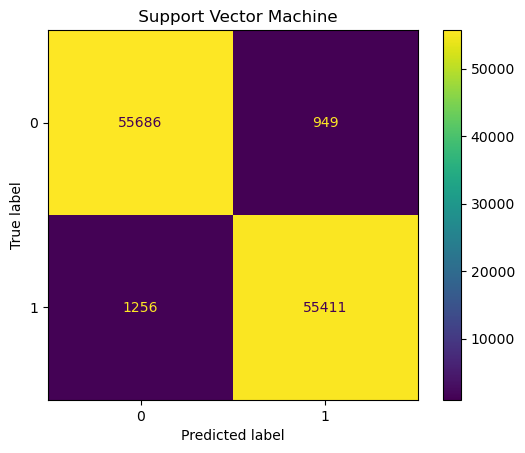

In [99]:
from sklearn import metrics

cm = confusion_matrix(y_test,prediction)
cm_display = metrics.ConfusionMatrixDisplay(cm)
cm_display.plot()
plt.title("         Support Vector Machine       ")
plt.show()

In [100]:
print("____________Classification Report - Support Vector Machine______________")
print('')

print(classification_report(y_test,prediction))

svc_accuracy = accuracy_score(y_test,prediction)
print("SVM_accuracy: %f" % svc_accuracy)

svc_precision = precision_score(y_test,prediction)
print("SVM_precision: %f" % svc_precision)

svc_recall = recall_score(y_test,prediction)
print("SVM_recall: %f" % svc_recall)

svc_f1_score = f1_score(y_test,prediction)
print("SVM_f1_score: %f" % svc_f1_score)

____________Classification Report - Support Vector Machine______________

              precision    recall  f1-score   support

           0       0.98      0.98      0.98     56635
           1       0.98      0.98      0.98     56667

    accuracy                           0.98    113302
   macro avg       0.98      0.98      0.98    113302
weighted avg       0.98      0.98      0.98    113302

SVM_accuracy: 0.980539
SVM_precision: 0.983162
SVM_recall: 0.977835
SVM_f1_score: 0.980491


## Performance and Evalution metrics

In [101]:
result = {'NAIVE BAYES':(nb_accuracy,nb_precision,nb_recall,nb_f1_score),
          'LOGISTIC REGRESSION':(lr_accuracy,lr_precision,lr_recall,lr_f1_score),
           'SUPPORT VECTOR MACHINE':(svc_accuracy,svc_precision,svc_recall,svc_f1_score),
           'DECISION TREE':(dt_accuracy,dt_precision,dt_recall,dt_f1_score),
           'K-NEAREST NEIGHBOUR':(knn_accuracy,knn_precision,knn_recall,knn_f1_score),
           'RANDOM FOREST':(rf_accuracy,rf_precision,rf_recall,rf_f1_score)
}

result = pd.DataFrame(result,index=['Accuracy','Precision','Recall','F1_score'])

In [102]:
result = result.round(decimals =4)
result

,NAIVE BAYES,LOGISTIC REGRESSION,SUPPORT VECTOR MACHINE,DECISION TREE,K-NEAREST NEIGHBOUR,RANDOM FOREST
Accuracy,0.9112,0.9437,0.9805,0.9980,0.9991,0.9999
Precision,0.9709,0.9727,0.9832,0.9971,0.9982,0.9998
Recall,0.8478,0.9130,0.9778,0.9989,1.0000,1.0000
F1_score,0.9052,0.9419,0.9805,0.9980,0.9991,0.9999


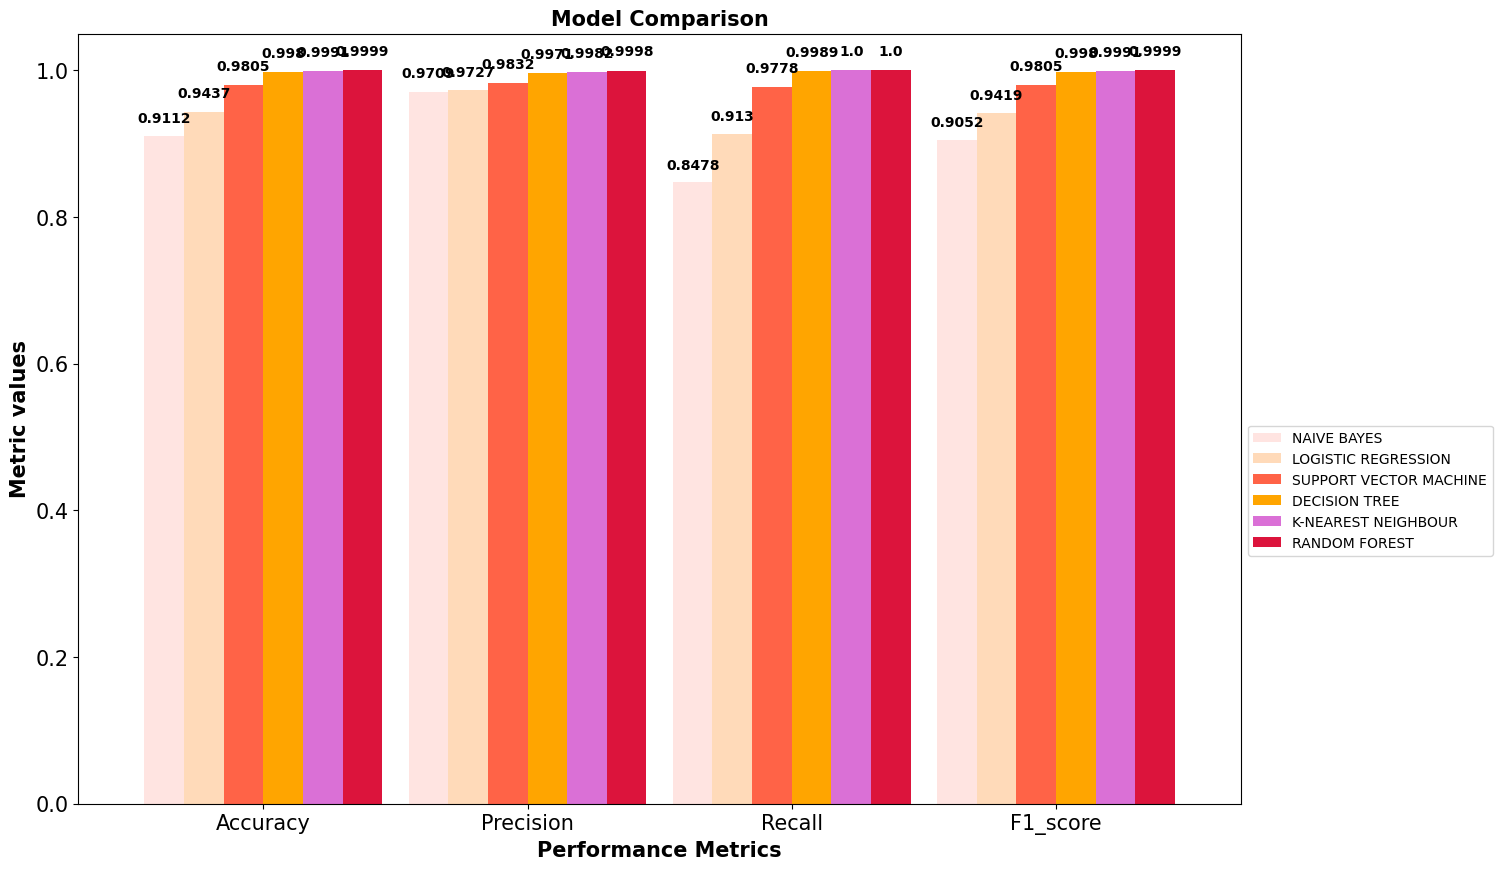

In [103]:
import matplotlib.pyplot as plt
colors_list=['mistyrose','peachpuff','tomato','orange','orchid','crimson']
ax = result.plot(kind='bar', figsize=(15,10), width=0.9, color=colors_list, edgecolor=None, fontsize=15)

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height}', (x + width/2, y + height*1.02), ha='center',fontweight='bold')

plt.title("Model Comparison",size=15,fontweight="bold")
plt.xlabel("Performance Metrics",size=15,fontweight="bold")
plt.ylabel("Metric values",size=15,fontweight="bold")

plt.xticks(rotation = 0)
plt.legend(bbox_to_anchor =(1, 0.5))
plt.show()

In [104]:
result.to_csv("comparion_results.csv")

## Hyper parameter tuning

In [28]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform,randint
import joblib

### Naive byes

In [15]:
# Creating pipeline with a StandardScaler and Gaussian Naive Bayes
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Optional
    ('nb_model', GaussianNB())
])

# hyperparameters
nb_params = {
    'nb_model__var_smoothing': uniform(1e-9, 1e-2)  # Uniform distribution for var_smoothing parameter
}

# Initialize RandomizedSearchCV with 3-fold cross-validation
nb_random_search = RandomizedSearchCV(
    pipeline, 
    param_distributions=nb_params, 
    n_iter=10,  # Number of random combinations to try
    cv=3, 
    scoring='accuracy',  # Score for accuracy
    random_state=42,  
    verbose=1 
)

# Fit the RandomizedSearchCV
nb_random_search.fit(X_train, y_train)

# Output 
print(f"Best Naive Bayes Params: {nb_random_search.best_params_}")
print(f"Best Score: {nb_random_search.best_score_}")


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Naive Bayes Params: {'nb_model__var_smoothing': 0.0005808371216819946}
Best Score: 0.9116159610241746


In [18]:
from sklearn.metrics import accuracy_score,recall_score,precision_score, f1_score, confusion_matrix, classification_report
# testing the samples with trained model
nb_best_model = nb_random_search.best_estimator_
nb_predictions = nb_best_model.predict(X_test)
nb_best_accuracy = accuracy_score(y_test, nb_predictions)
print(f"Naive byes Accuracy: {nb_best_accuracy}")

Naive byes Accuracy: 0.9119874318193854


### Logistic Regression

In [19]:
# Creating pipeline with a StandardScaler and Logistic Regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logistic_model', LogisticRegression())
])

# hyperparameters
logistic_params = {
#     'logistic_model__penalty': ['l2', 'l1', 'elasticnet', 'none'],  # Regularization types
    'logistic_model__C': uniform(0.01, 10),  # Uniform distribution for 'C' regularization strength
#     'logistic_model__solver': ['lbfgs', 'liblinear', 'saga']  # Solvers to test
}

# Initialize RandomizedSearchCV with 3-fold cross-validation
lr_random_search = RandomizedSearchCV(pipeline, param_distributions=logistic_params, n_iter=10, cv=3, 
    scoring='accuracy',  
    random_state=42,  
    verbose=1  
)

# Fit the RandomizedSearchCV
lr_random_search.fit(X_train, y_train)

# Output 
print(f"Best Logistic Regression Params: {lr_random_search.best_params_}")
print(f"Best Score: {lr_random_search.best_score_}")


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Logistic Regression Params: {'logistic_model__C': 9.51714306409916}
Best Score: 0.9446253784167835


In [20]:
# testing the samples with trained model
lr_best_model = lr_random_search.best_estimator_
lr_predictions = lr_best_model.predict(X_test)
lr_best_accuracy = accuracy_score(y_test, lr_predictions)
print(f"Logistic Regression Accuracy: {lr_best_accuracy}")

Logistic Regression Accuracy: 0.9448818202679564


### SVM

In [21]:
# Creating pipeline with a StandardScaler and Support Vector Machine
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Scaling is important for SVM
    ('svm_model', SVC())
])

# hyperparameters
svm_params = {
#        'svm_model__C': uniform(0.1)  # Regularization parameter
    'svm_model__kernel': ['linear', 'rbf']  # Kernel type
#     'svm_model__gamma': ['scale', 'auto'],  # Kernel coefficient (for rbf, poly, and sigmoid)
#     'svm_model__degree': randint(2, 5),  # Degree of the polynomial kernel function (only relevant for 'poly')
}

# Initialize RandomizedSearchCV with 2-fold cross-validation
svm_random_search = RandomizedSearchCV(
    pipeline, 
    param_distributions=svm_params, 
    n_iter=2,  
    cv=2, 
    scoring='accuracy',  
    random_state=42,  
    verbose=1,  
    n_jobs=-1 
)

# Fit the RandomizedSearchCV
svm_random_search.fit(X_train, y_train)

# Output the best hyperparameters and the best score
print(f"Best SVM Params: {svm_random_search.best_params_}")
print(f"Best Score: {svm_random_search.best_score_}")

Fitting 2 folds for each of 2 candidates, totalling 4 fits
Best SVM Params: {'svm_model__kernel': 'rbf'}
Best Score: 0.989885349643869


In [22]:
# testing the samples with trained model
svm_best_model = svm_random_search.best_estimator_
svm_predictions = svm_best_model.predict(X_test)
svm_best_accuracy = accuracy_score(y_test, svm_predictions)
print(f"Support Vector Machine Accuracy: {svm_best_accuracy}")

Support Vector Machine Accuracy: 0.9927362270745441


### Decision Tree

In [23]:
# Creating pipeline with a StandardScaler and Decision Tree
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standard scaling (optional, not strictly needed for Decision Trees)
    ('dt_model', DecisionTreeClassifier(random_state=42))
])

# hyperparameters for Decision Tree
dt_params = {
    'dt_model__criterion': ['gini', 'entropy'],  # Split criterion
#     'dt_model__max_depth': randint(1, 20),  # Maximum depth of the tree
#     'dt_model__min_samples_split': randint(2, 10),  # Minimum number of samples required to split
#     'dt_model__min_samples_leaf': randint(1, 10),  # Minimum number of samples per leaf node
 }

# Initialize RandomizedSearchCV with 3-fold cross-validation
dt_random_search = RandomizedSearchCV(
    pipeline, 
    param_distributions=dt_params, 
    n_iter=10,  
    cv=3, 
    scoring='accuracy',  
    random_state=42, 
    verbose=1  
)

# Fit the RandomizedSearchCV 
dt_random_search.fit(X_train, y_train)

# Output 
print(f"Best Decision Tree Params: {dt_random_search.best_params_}")
print(f"Best Score: {dt_random_search.best_score_}")


Fitting 3 folds for each of 2 candidates, totalling 6 fits
Best Decision Tree Params: {'dt_model__criterion': 'entropy'}
Best Score: 0.9978089337252097


In [24]:
# testing the samples with trained model
dt_best_model = dt_random_search.best_estimator_
dt_predictions = dt_best_model.predict(X_test)
dt_best_accuracy = accuracy_score(y_test, dt_predictions)
print(f"Decision Tree Accuracy: {dt_best_accuracy}")

Decision Tree Accuracy: 0.9984819332403665


### KNN

In [25]:
# Create a pipeline with a StandardScaler and K-Nearest Neighbors Classifier
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Scaling is important for KNN
    ('knn_model', KNeighborsClassifier())
])

# hyperparameters for K-Nearest Neighbors
knn_params = {
    'knn_model__n_neighbors': randint(1, 10),  # Number of neighbors to use
#     'knn_model__weights': ['uniform', 'distance'],  # Weight function used in prediction
#     'knn_model__p': randint(1, 2)  # Power parameter for the Minkowski metric (1 = Manhattan, 2 = Euclidean)
}

# Initialize RandomizedSearchCV with 3-fold cross-validation
knn_random_search = RandomizedSearchCV(
    pipeline, 
    param_distributions=knn_params, 
    n_iter=10,  # Number of random combinations to try
    cv=3, 
    scoring='accuracy',  # Scoring metric for classification
    random_state=42,  # For reproducibility
    verbose=1  # Optional: to show progress
)

# Fit the RandomizedSearchCV 
knn_random_search.fit(X_train, y_train)

# Output 
print(f"Best KNN Params: {knn_random_search.best_params_}")
print(f"Best Score: {knn_random_search.best_score_}")


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best KNN Params: {'knn_model__n_neighbors': 4}
Best Score: 0.998484126353695


In [26]:
# testing the samples with trained model
knn_best_model = knn_random_search.best_estimator_
knn_predictions = knn_best_model.predict(X_test)
knn_best_accuracy = accuracy_score(y_test, knn_predictions)
print(f"K-nearest neighbour Accuracy: {knn_best_accuracy}")

K-nearest neighbour Accuracy: 0.9989497096256024


### Random forest

In [27]:
# Create a pipeline with a StandardScaler and Random Forest Classifier
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Optional, Random Forest doesn't need scaling, but can be useful for comparison
    ('rf_model', RandomForestClassifier(random_state=42))
])

# hyperparameters for Random Forest
rf_params = {
    'rf_model__n_estimators': randint(5, 10),  # Number of trees in the forest
#     'rf_model__max_depth': randint(3, 20),  # Maximum depth of each tree
#     'rf_model__min_samples_split': randint(2, 10),  # Minimum number of samples required to split a node
#     'rf_model__min_samples_leaf': randint(1, 10),  # Minimum number of samples required at each leaf node
#     'rf_model__criterion': ['gini', 'entropy']  # Function to measure the quality of a split
}

# Initialize RandomizedSearchCV with 3-fold cross-validation
rf_random_search = RandomizedSearchCV(
    pipeline, 
    param_distributions=rf_params, 
    n_iter=10,  # Number of random combinations to try
    cv=3, 
    scoring='accuracy',  # Scoring metric for classification
    random_state=42,  # For reproducibility
    verbose=1  # Optional: to show progress
)

# Fit the RandomizedSearchCV
rf_random_search.fit(X_train, y_train)

# Output 
print(f"Best Random Forest Params: {rf_random_search.best_params_}")
print(f"Best Score: {rf_random_search.best_score_}")


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Random Forest Params: {'rf_model__n_estimators': 9}
Best Score: 0.9997506641600692


In [29]:
# Save the best model to a file
rf_best_model = rf_random_search.best_estimator_
joblib.dump(rf_best_model, 'best_random_forest_model.pkl')

# load the model
rf_best_model = joblib.load('best_random_forest_model.pkl')

# testing the samples with trained model
rf_predictions = rf_best_model.predict(X_test)
rf_best_accuracy = accuracy_score(y_test, rf_predictions)
print(f"Random Forest Accuracy: {rf_best_accuracy}")

Random Forest Accuracy: 0.9998411325484104


## Results:

In [30]:
accuracy_dict = {
    'Naive Byes': nb_best_accuracy,
    'Logistic Regression': lr_best_accuracy,
    'KNN': knn_best_accuracy,
    'Decision Tree': dt_best_accuracy,
    'Random Forest': rf_best_accuracy,
    'SVM': svm_best_accuracy
}

best_model_name = max(accuracy_dict, key=accuracy_dict.get)
print(f"The best model is ****{best_model_name}**** with an accuracy of {accuracy_dict[best_model_name]}")

The best model is ****Random Forest**** with an accuracy of 0.9998411325484104
